In [1]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
from statsmodels.tsa.arima_model import ARIMA
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize']=20,12

In [2]:
dataset= pd.read_csv('Electric_Production.csv')
dataset['DATE']=pd.to_datetime(dataset['DATE'],infer_datetime_format = True)
indexedDataset=dataset.set_index(['DATE'])

In [3]:
from datetime import datetime
indexedDataset

,IPG2211A2N
DATE,
1985-01-01,72.5052
1985-02-01,70.6720
1985-03-01,62.4502
1985-04-01,57.4714
1985-05-01,55.3151
...,...
2017-09-01,98.6154
2017-10-01,93.6137
2017-11-01,97.3359


In [4]:
len(indexedDataset)

397

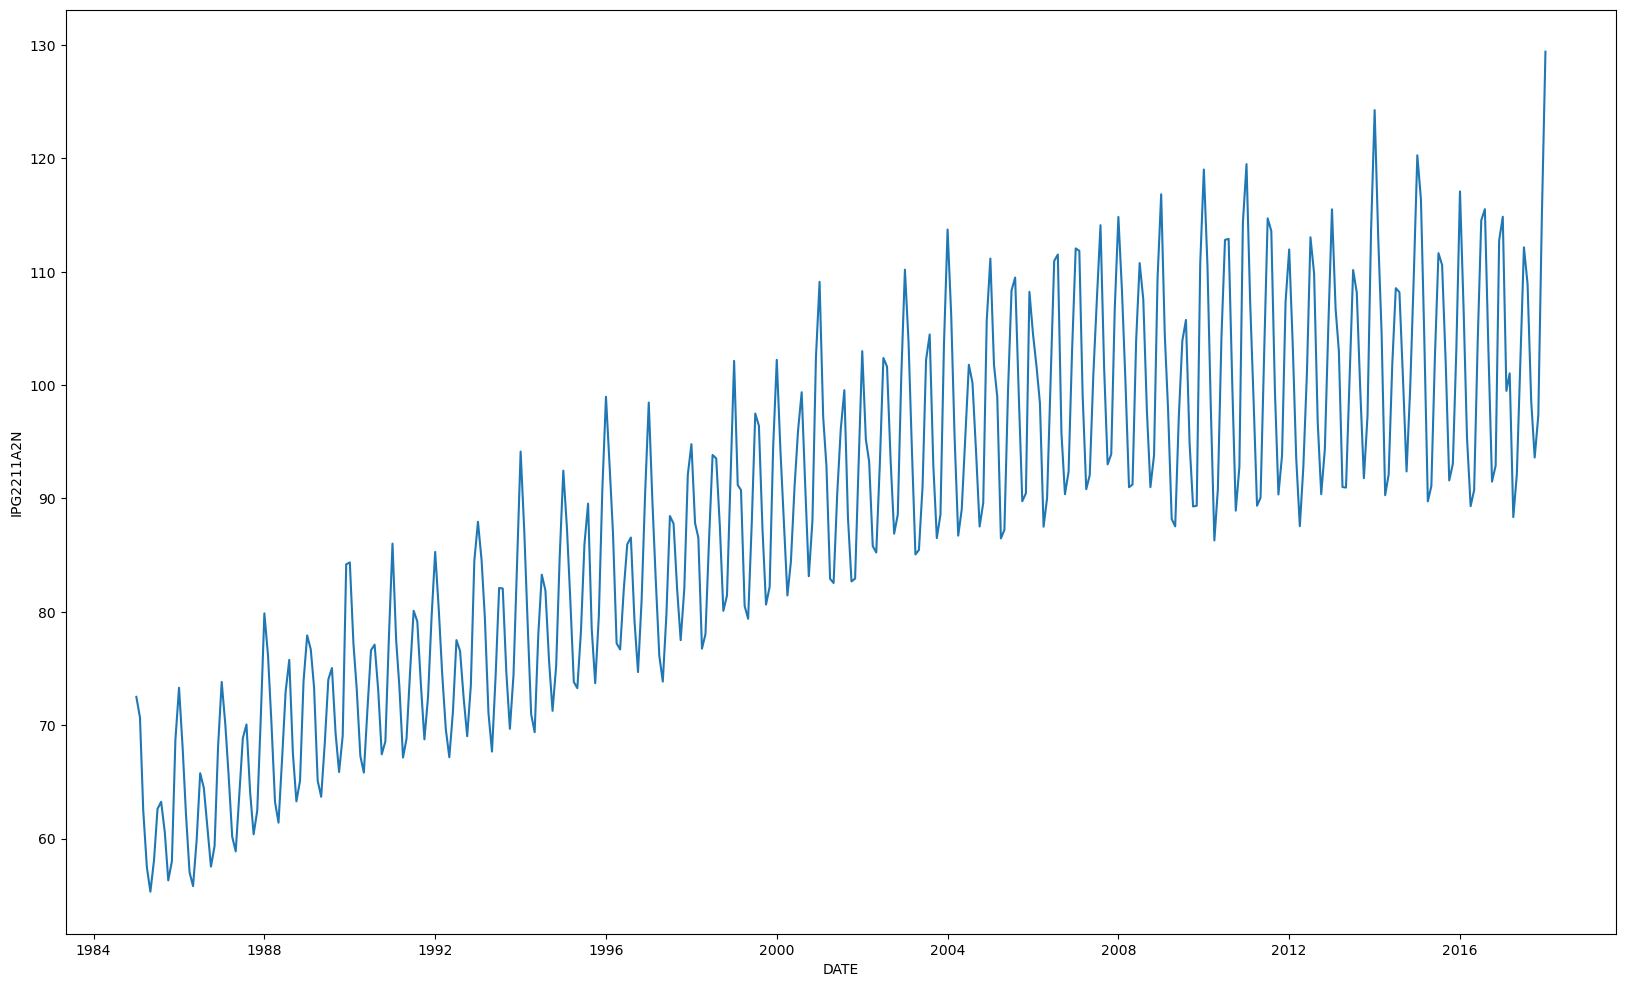

In [5]:
# plot graph
plt.xlabel("DATE")
plt.ylabel("IPG2211A2N")
plt.plot(indexedDataset)

In [6]:
rolmean=indexedDataset.rolling(window=12).mean()
rolstd=indexedDataset.rolling(window=12).std()

In [7]:
print(rolmean)

            IPG2211A2N
DATE                  
1985-01-01         NaN
1985-02-01         NaN
1985-03-01         NaN
1985-04-01         NaN
1985-05-01         NaN
...                ...
2017-09-01  101.234450
2017-10-01  101.411700
2017-11-01  101.782192
2017-12-01  101.944842
2018-01-01  103.157700

[397 rows x 1 columns]


In [8]:
print(rolstd)

            IPG2211A2N
DATE                  
1985-01-01         NaN
1985-02-01         NaN
1985-03-01         NaN
1985-04-01         NaN
1985-05-01         NaN
...                ...
2017-09-01    9.155641
2017-10-01    8.968447
2017-11-01    8.671317
2017-12-01    8.911131
2018-01-01   11.454780

[397 rows x 1 columns]


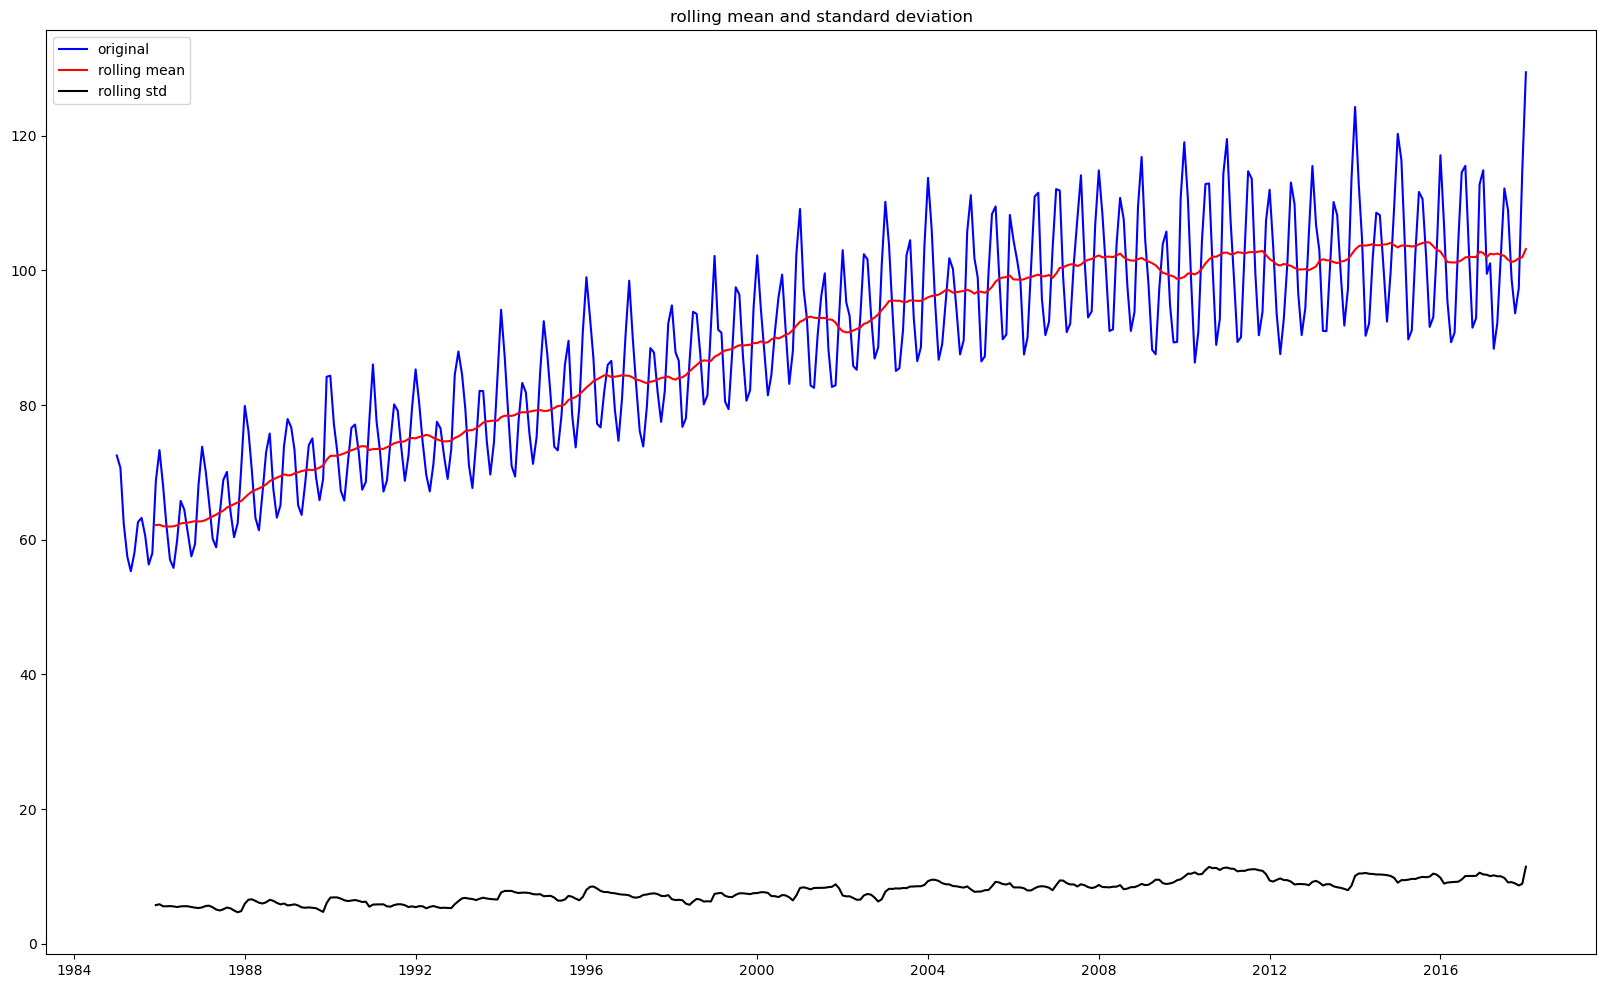

In [9]:
orig=plt.plot(indexedDataset, color='blue', label='original')
mean=plt.plot(rolmean, color='red', label='rolling mean' )
std=plt.plot(rolstd, color='black', label='rolling std')
plt.legend(loc='best')
plt.title('rolling mean and standard deviation')
plt.show(block=False)

In [10]:
print('Dataset is Stationary according to statistics of mean and standard deviation')

Dataset is Stationary according to statistics of mean and standard deviation


In [11]:
indexedDataset['IPG2211A2N']=indexedDataset['IPG2211A2N'].fillna(0.0)
indexedDataset

,IPG2211A2N
DATE,
1985-01-01,72.5052
1985-02-01,70.6720
1985-03-01,62.4502
1985-04-01,57.4714
1985-05-01,55.3151
...,...
2017-09-01,98.6154
2017-10-01,93.6137
2017-11-01,97.3359


In [12]:
#Dickey-Fuller testi, zaman serisi verilerinin birim kök (unit root) özelliğine sahip olup olmadığını 
#değerlendirmek için kullanılan bir istatistiksel testtir. Birim kök, zaman serisinin istatistiksel açıdan 
#durağan olmadığı anlamına gelir. Durağanlık, zaman serisinin istatistiksel özelliklerinin zamanla 
#değişmediği anlamına gelir ve birçok zaman serisi analizinde önemli bir gerekliliktir.
# Perform Dickey-Fuller Test
from statsmodels.tsa.stattools import adfuller
print('Results of Dickey-Fuller Test : ')
dftest=adfuller(indexedDataset['IPG2211A2N'], autolag='AIC')
dfoutput=pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', 'Lags Used','Number of Observations Used'])
for key,value in dftest[4].items():
     dfoutput['Critical value (%s)' %key]=value
print(dfoutput)

Results of Dickey-Fuller Test : 
Test Statistic                  -2.256990
p-value                          0.186215
Lags Used                       15.000000
Number of Observations Used    381.000000
Critical value (1%)             -3.447631
Critical value (5%)             -2.869156
Critical value (10%)            -2.570827
dtype: float64


,IPG2211A2N
DATE,
1985-01-01,4.283658
1985-02-01,4.258049
1985-03-01,4.134369
1985-04-01,4.051287
1985-05-01,4.013046
...,...
2017-09-01,4.591227
2017-10-01,4.539177
2017-11-01,4.578168


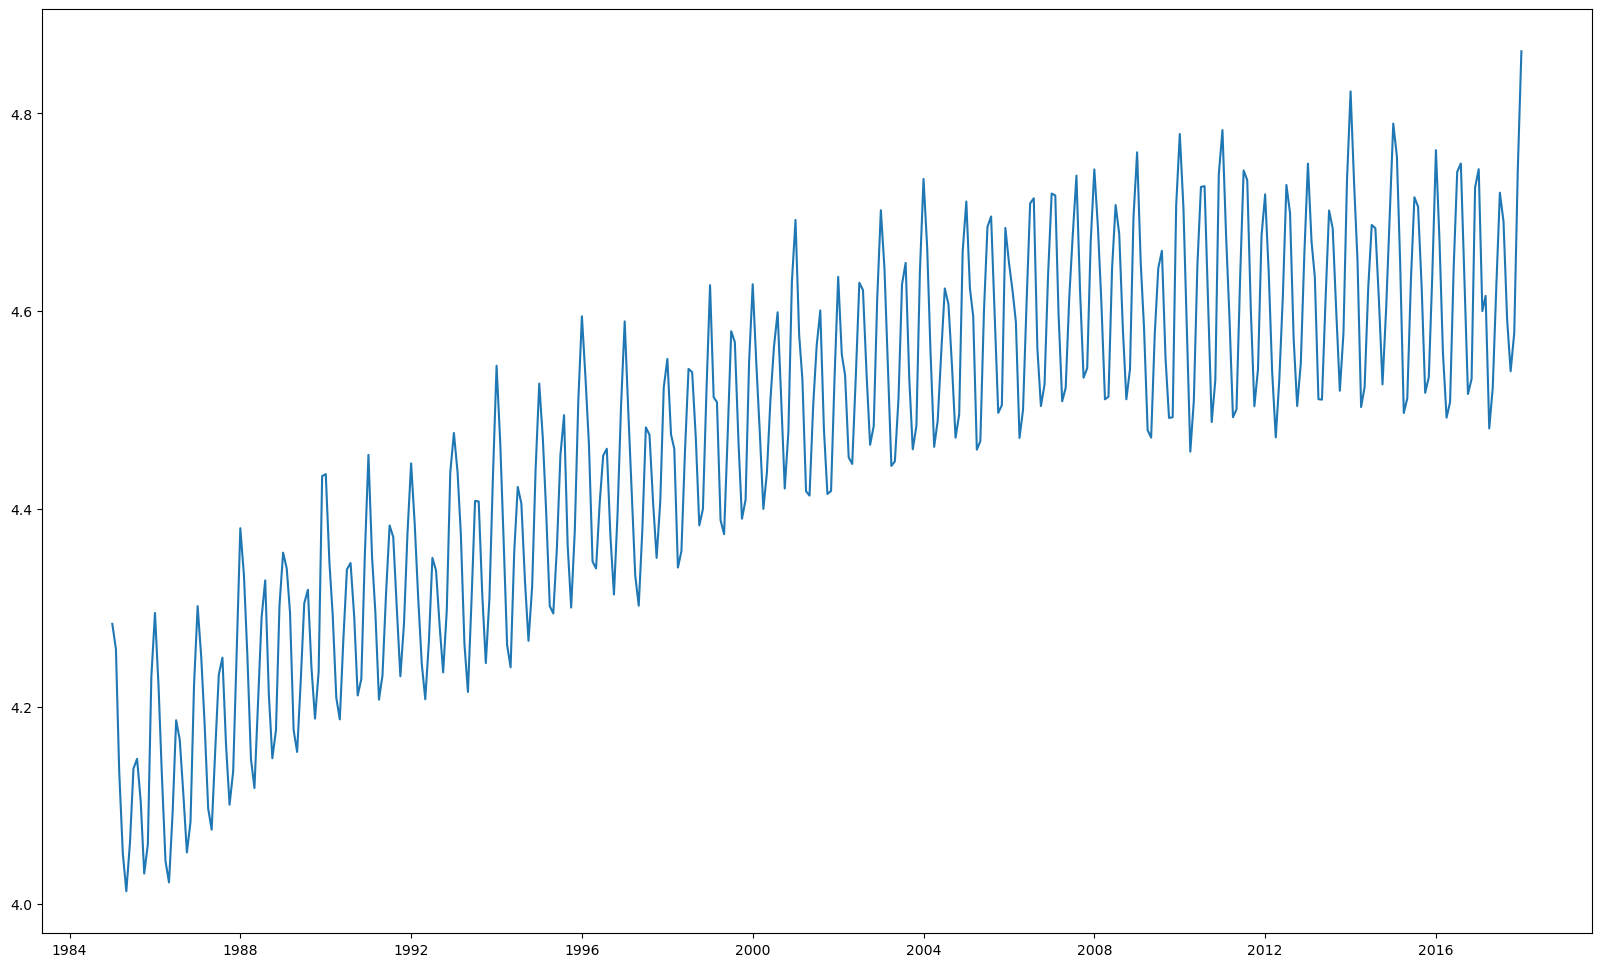

In [13]:
#Estimating Trend (scale has changed)
indexedDataset_logscale=np.log(indexedDataset)
plt.plot(indexedDataset_logscale)
indexedDataset_logscale

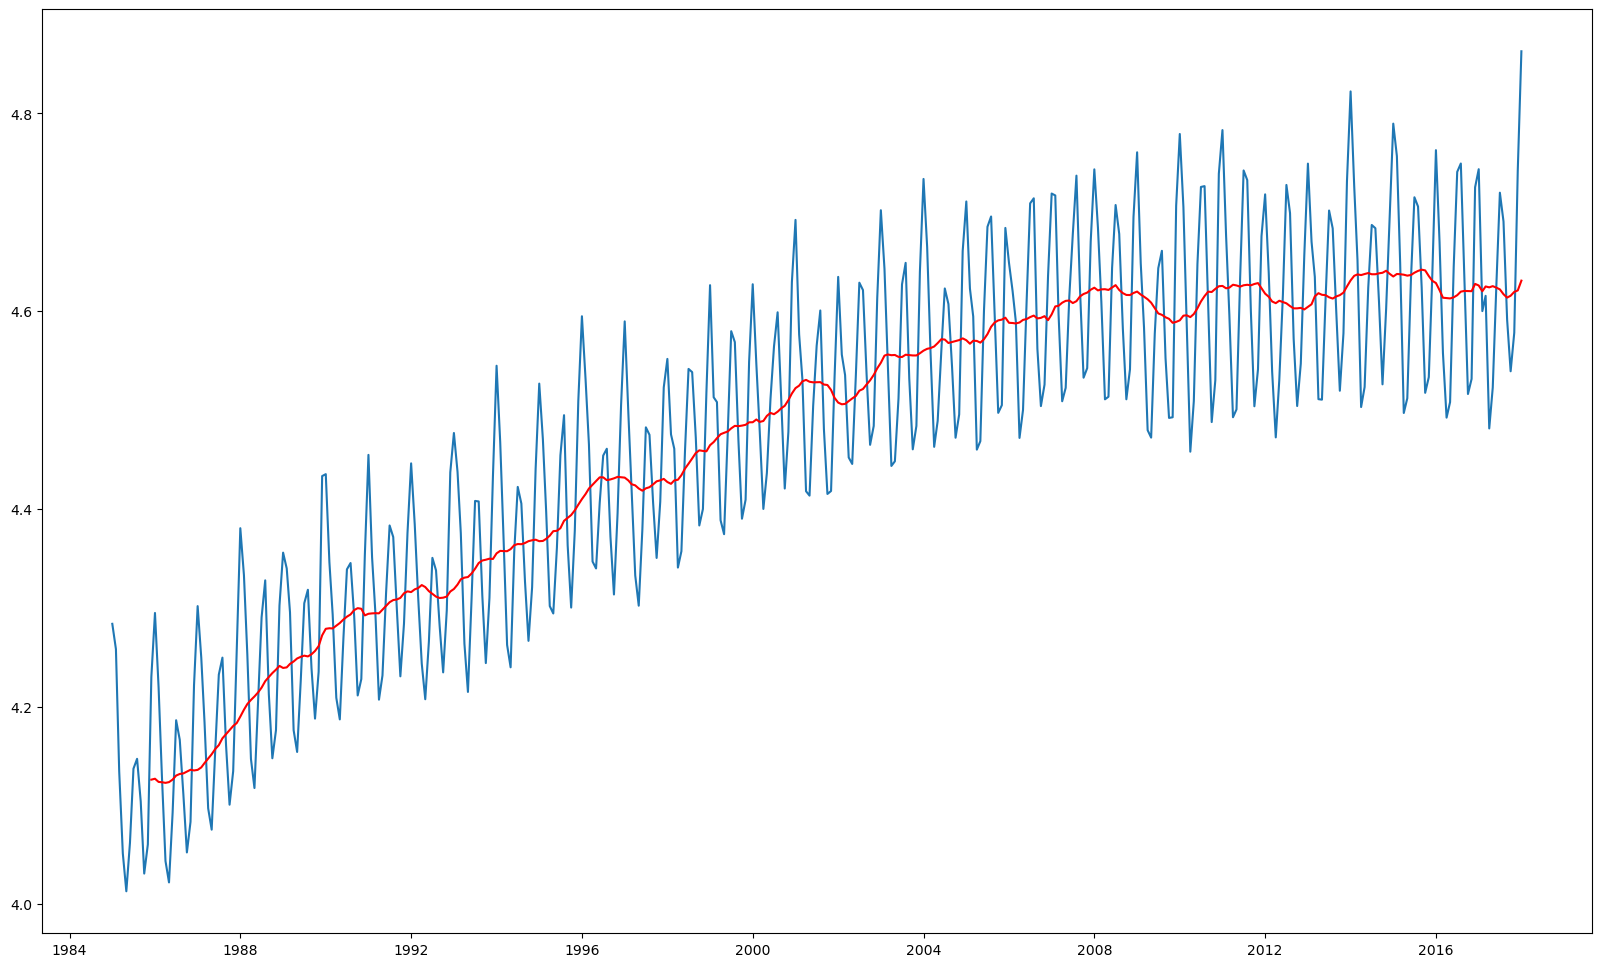

In [14]:
#Taking MA (Moving Average Model)
movingAverage=indexedDataset_logscale.rolling(window=12).mean()
movingSTD=indexedDataset_logscale.rolling(window=12).std()
plt.plot(indexedDataset_logscale)
plt.plot(movingAverage, color='red')

In [15]:
datasetLogScaleMinusMovingAverage=indexedDataset_logscale - movingAverage

In [16]:
movingAverage

,IPG2211A2N
DATE,
1985-01-01,NaN
1985-02-01,NaN
1985-03-01,NaN
1985-04-01,NaN
1985-05-01,NaN
...,...
2017-09-01,4.613704
2017-10-01,4.615619
2017-11-01,4.619515


In [17]:
#Remove Nan Values
datasetLogScaleMinusMovingAverage = datasetLogScaleMinusMovingAverage.dropna()
datasetLogScaleMinusMovingAverage.head(50)

,IPG2211A2N
DATE,
1985-12-01,0.103961
1986-01-01,0.167724
1986-02-01,0.095629
1986-03-01,0.007329
1986-04-01,-0.079115
1986-05-01,-0.101472
1986-06-01,-0.033363
1986-07-01,0.055963
1986-08-01,0.034639


In [18]:
#DCF Test (Augmented Dickey-Fuller (ADF) Test)
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):

        #Determing rolling statistics
        movingAverage=timeseries.rolling(window=12).mean()
        movingSTD=timeseries.rolling(window=12).std()
        #plot rolling statistics
        orig = plt.plot(timeseries, color='blue', label='Original')
        mean =plt.plot(movingAverage, color='red', label='Rolling Mean')
        std = plt.plot(movingSTD, color='black', label='Rolling Std')
        plt.legend(loc='best')
        plt.title('Rolling Mean and standard Deviation')
        plt.show(block=False)
        #Perform Dickey-fuller test
        print('Results of Dickey-fuller Test')
        dftest=adfuller(timeseries['IPG2211A2N'], autolag='AIC')
        dfoutput=pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', 'Lags Use','Number of Observations Used'])
        for key,value in dftest[4].items():
             dfoutput['Critical value (%s)' %key]=value
        print(dfoutput)

        movingAverage
        movingSTD
        dftest
        dfoutput
        datasetLogScaleMinusMovingAverage

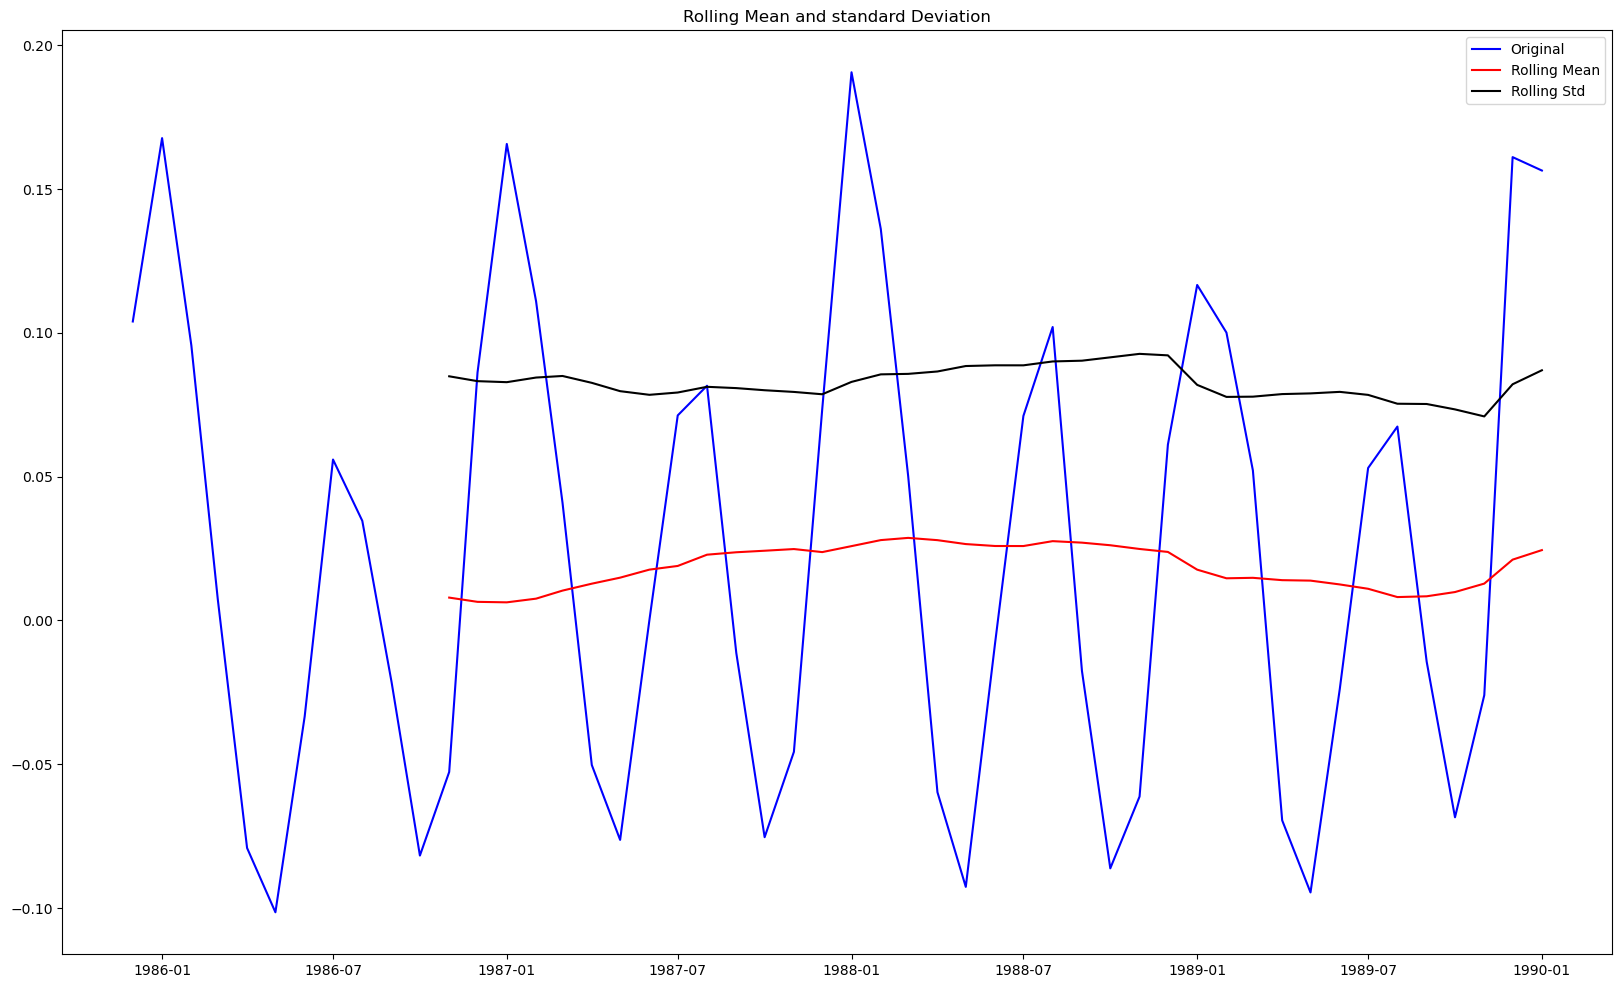

Results of Dickey-fuller Test
Test Statistic                 -1.689809
p-value                         0.436371
Lags Use                       10.000000
Number of Observations Used    39.000000
Critical value (1%)            -3.610400
Critical value (5%)            -2.939109
Critical value (10%)           -2.608063
dtype: float64


In [19]:
test_stationarity(datasetLogScaleMinusMovingAverage.head(50))

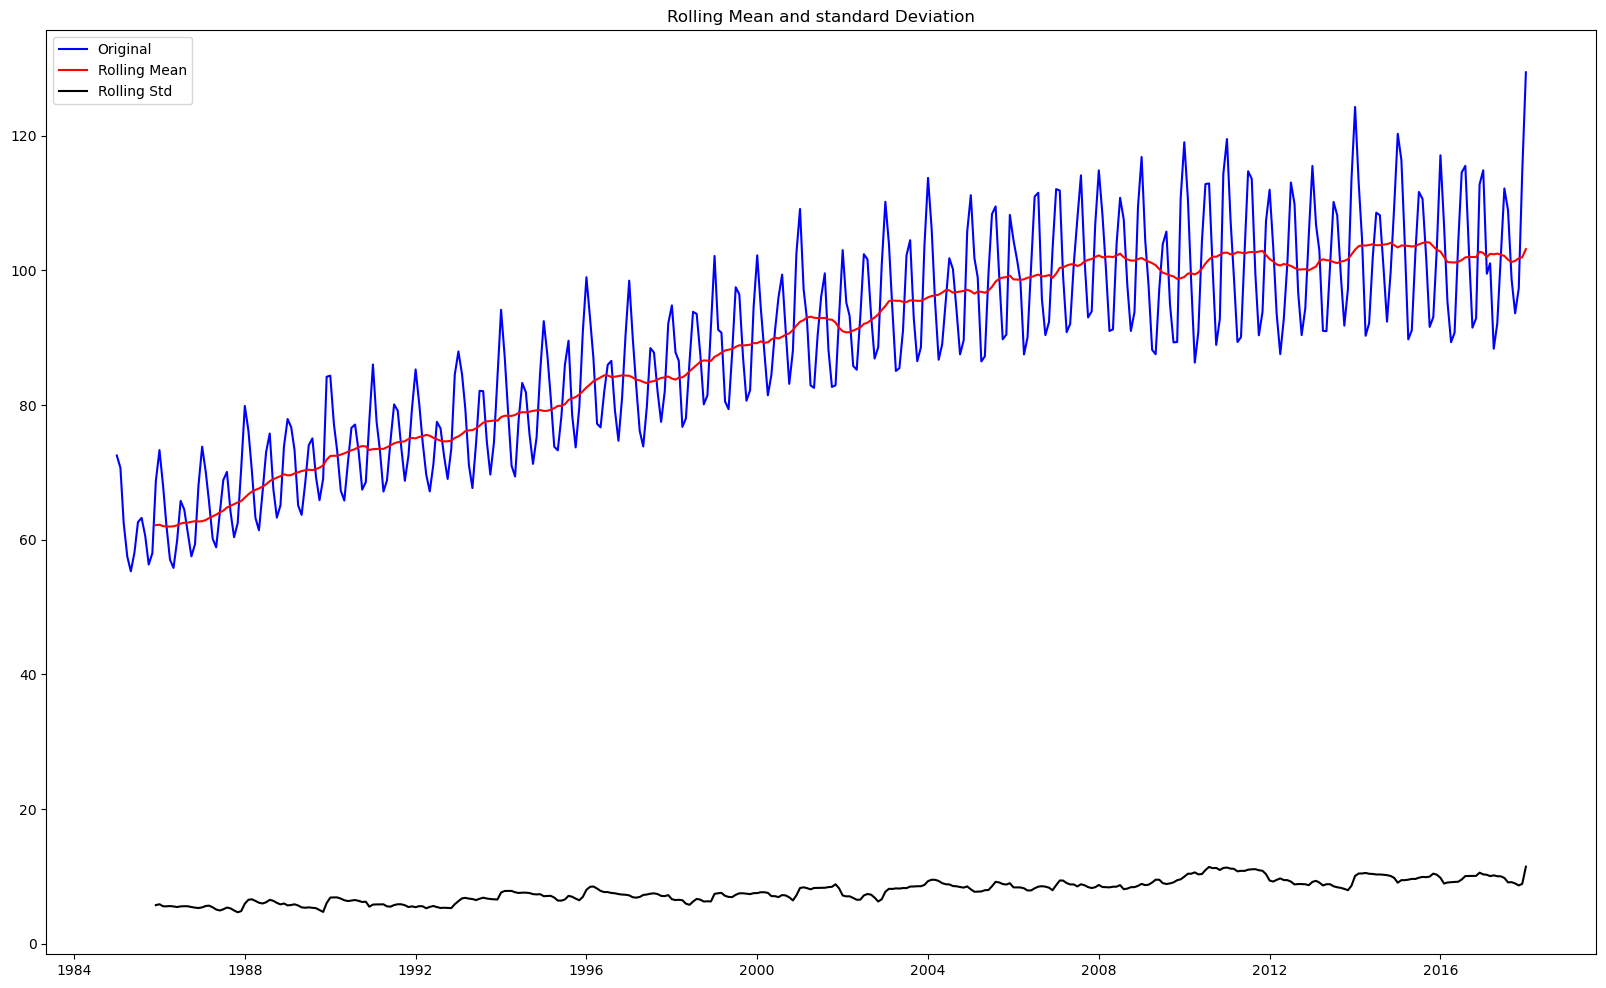

Results of Dickey-fuller Test
Test Statistic                  -2.256990
p-value                          0.186215
Lags Use                        15.000000
Number of Observations Used    381.000000
Critical value (1%)             -3.447631
Critical value (5%)             -2.869156
Critical value (10%)            -2.570827
dtype: float64


In [20]:
test_stationarity(indexedDataset)

In [21]:
datasetLogScaleMinusMovingAverage["IPG2211A2N"]

DATE
1985-12-01    0.103961
1986-01-01    0.167724
1986-02-01    0.095629
1986-03-01    0.007329
1986-04-01   -0.079115
                ...   
2017-09-01   -0.022477
2017-10-01   -0.076443
2017-11-01   -0.041347
2017-12-01    0.121560
2018-01-01    0.232057
Name: IPG2211A2N, Length: 386, dtype: float64

In [22]:
datasetLogScaleMinusMovingAverage=datasetLogScaleMinusMovingAverage.dropna()

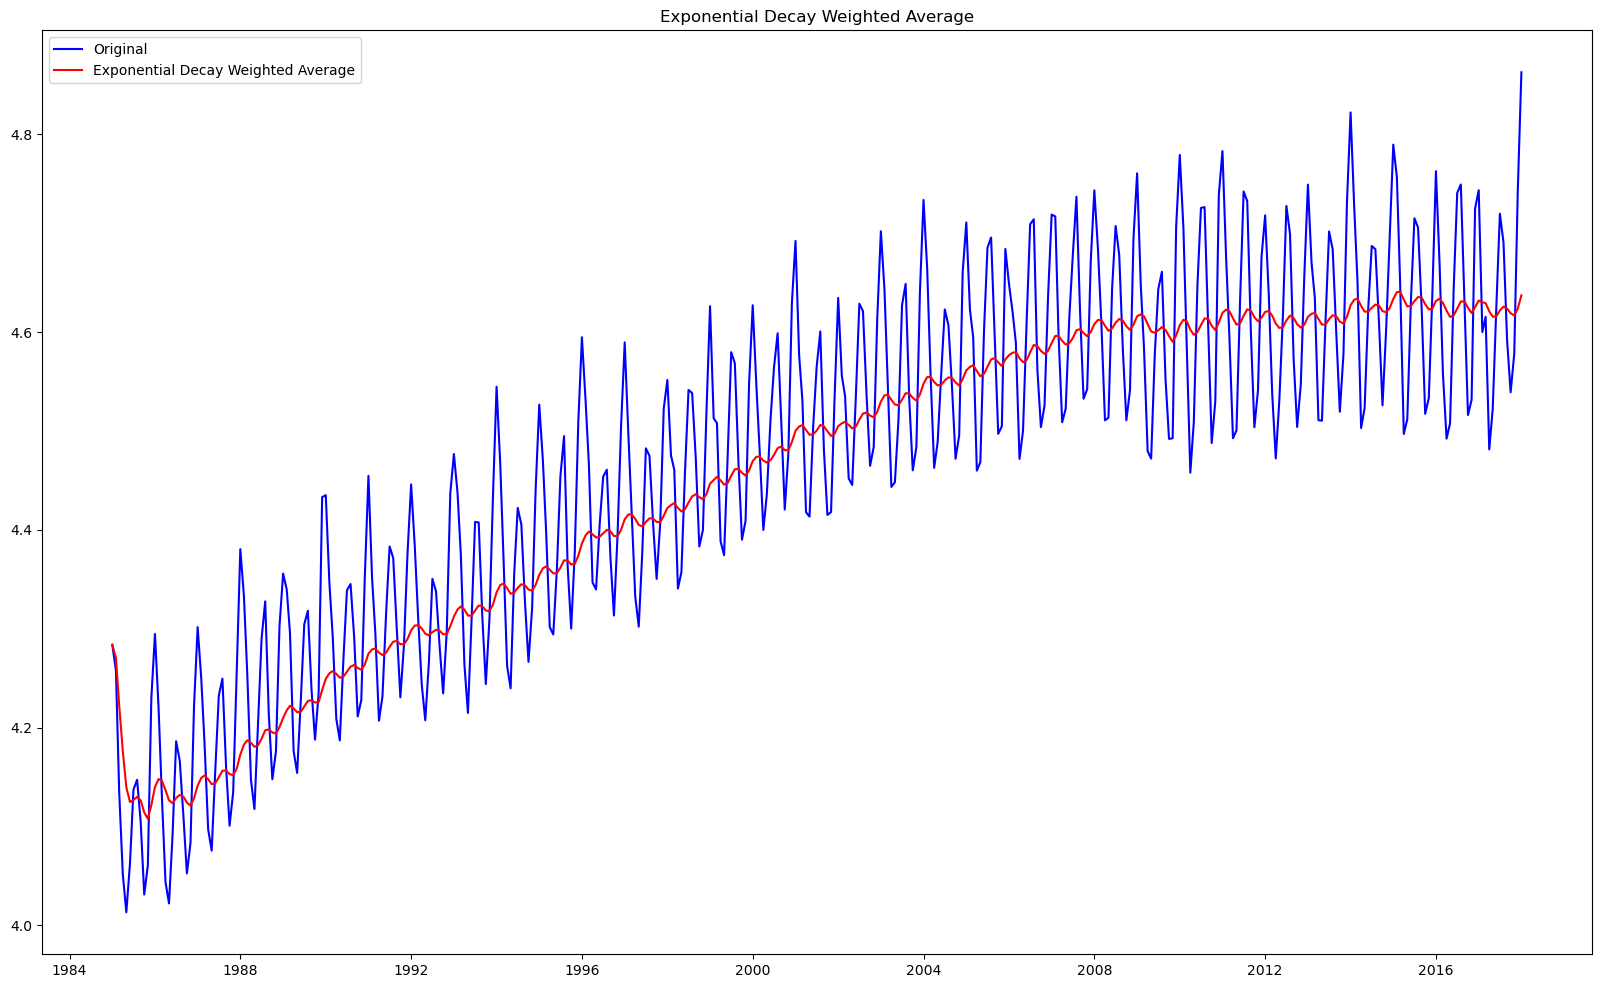

In [23]:
import matplotlib.pyplot as plt

# Assuming you have 'indexedDataset_logscale' as the log-scaled time series data

# Calculate the exponential decay weighted average
exponentialDecayWeightedAverage = indexedDataset_logscale.ewm(halflife=12, min_periods=0, adjust=True).mean()

# Plot the original time series and the exponential decay weighted average
plt.plot(indexedDataset_logscale, label='Original', color='blue')
plt.plot(exponentialDecayWeightedAverage, label='Exponential Decay Weighted Average', color='red')
plt.legend(loc='best')
plt.title('Exponential Decay Weighted Average')
plt.show()

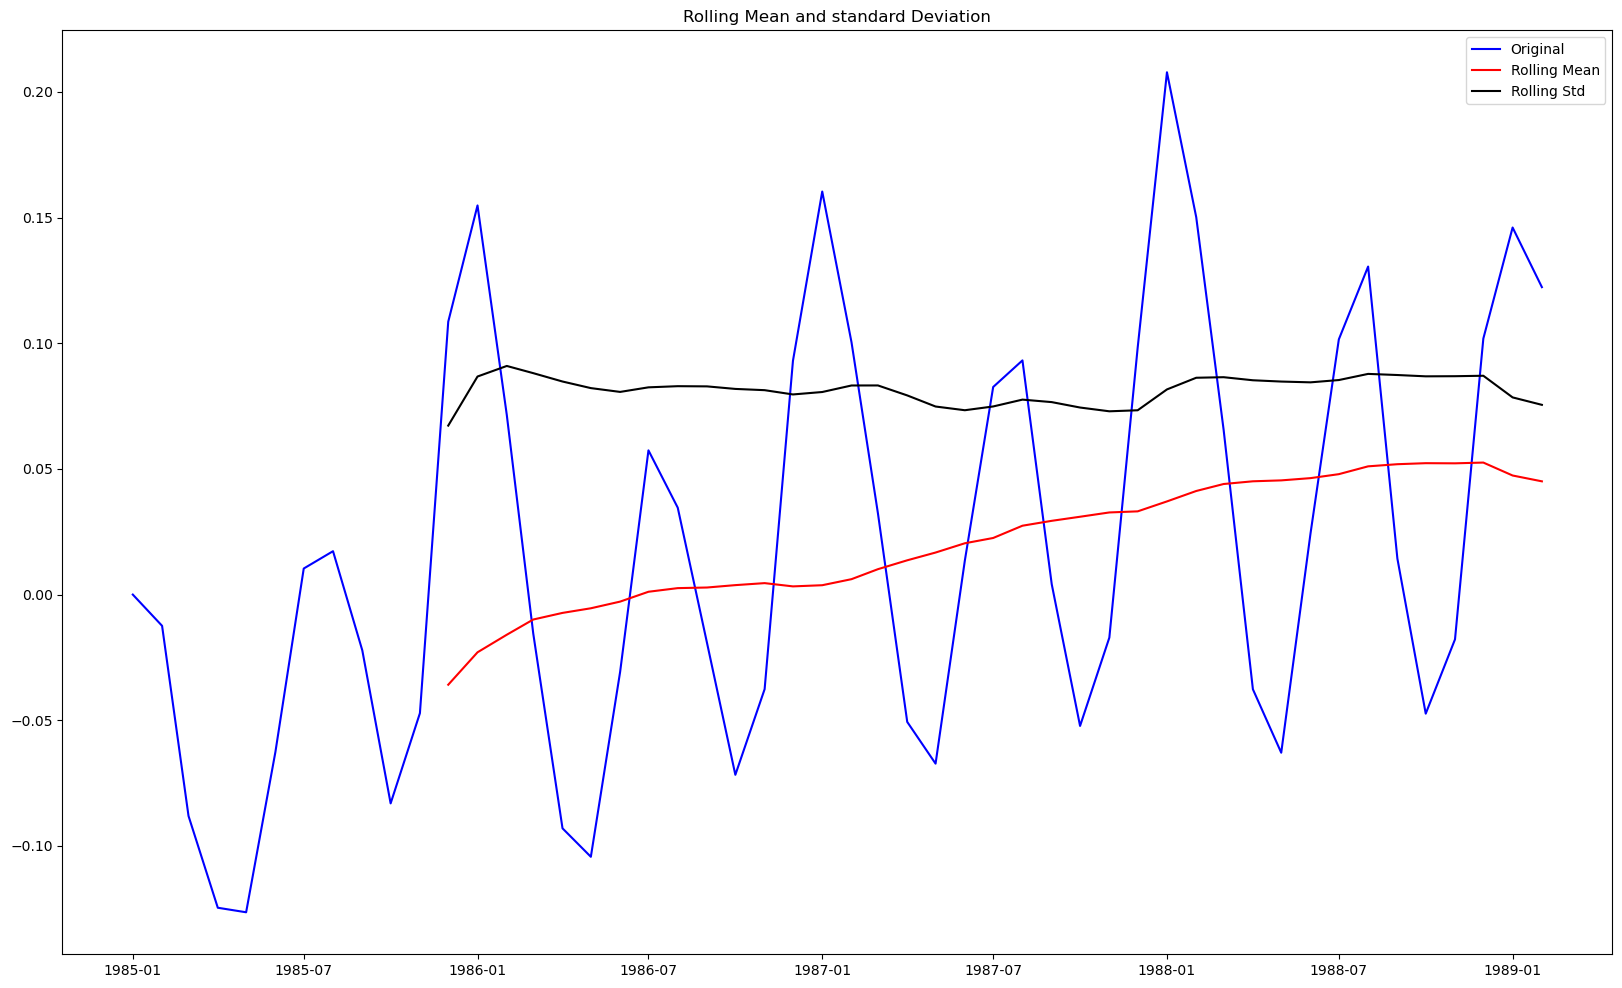

Results of Dickey-fuller Test
Test Statistic                 -2.894185
p-value                         0.046028
Lags Use                       10.000000
Number of Observations Used    39.000000
Critical value (1%)            -3.610400
Critical value (5%)            -2.939109
Critical value (10%)           -2.608063
dtype: float64


In [24]:
# Assuming you have 'indexedDataset_logscale' and 'exponentialDecayWeightedAverage' calculated earlier

# Calculate the difference between the log-scaled time series and the exponential decay weighted average
datasetLogScaleMinusMovingExponentialDecayAverage = indexedDataset_logscale - exponentialDecayWeightedAverage

# Drop any NaN values, if present
datasetLogScaleMinusMovingExponentialDecayAverage.dropna(inplace=True)

# Perform stationarity test on the transformed series
test_stationarity(datasetLogScaleMinusMovingExponentialDecayAverage.head(50))

,IPG2211A2N
DATE,
1985-01-01,NaN
1985-02-01,-0.025609
1985-03-01,-0.123680
1985-04-01,-0.083082
1985-05-01,-0.038242
...,...
2017-09-01,-0.099489
2017-10-01,-0.052051
2017-11-01,0.038991


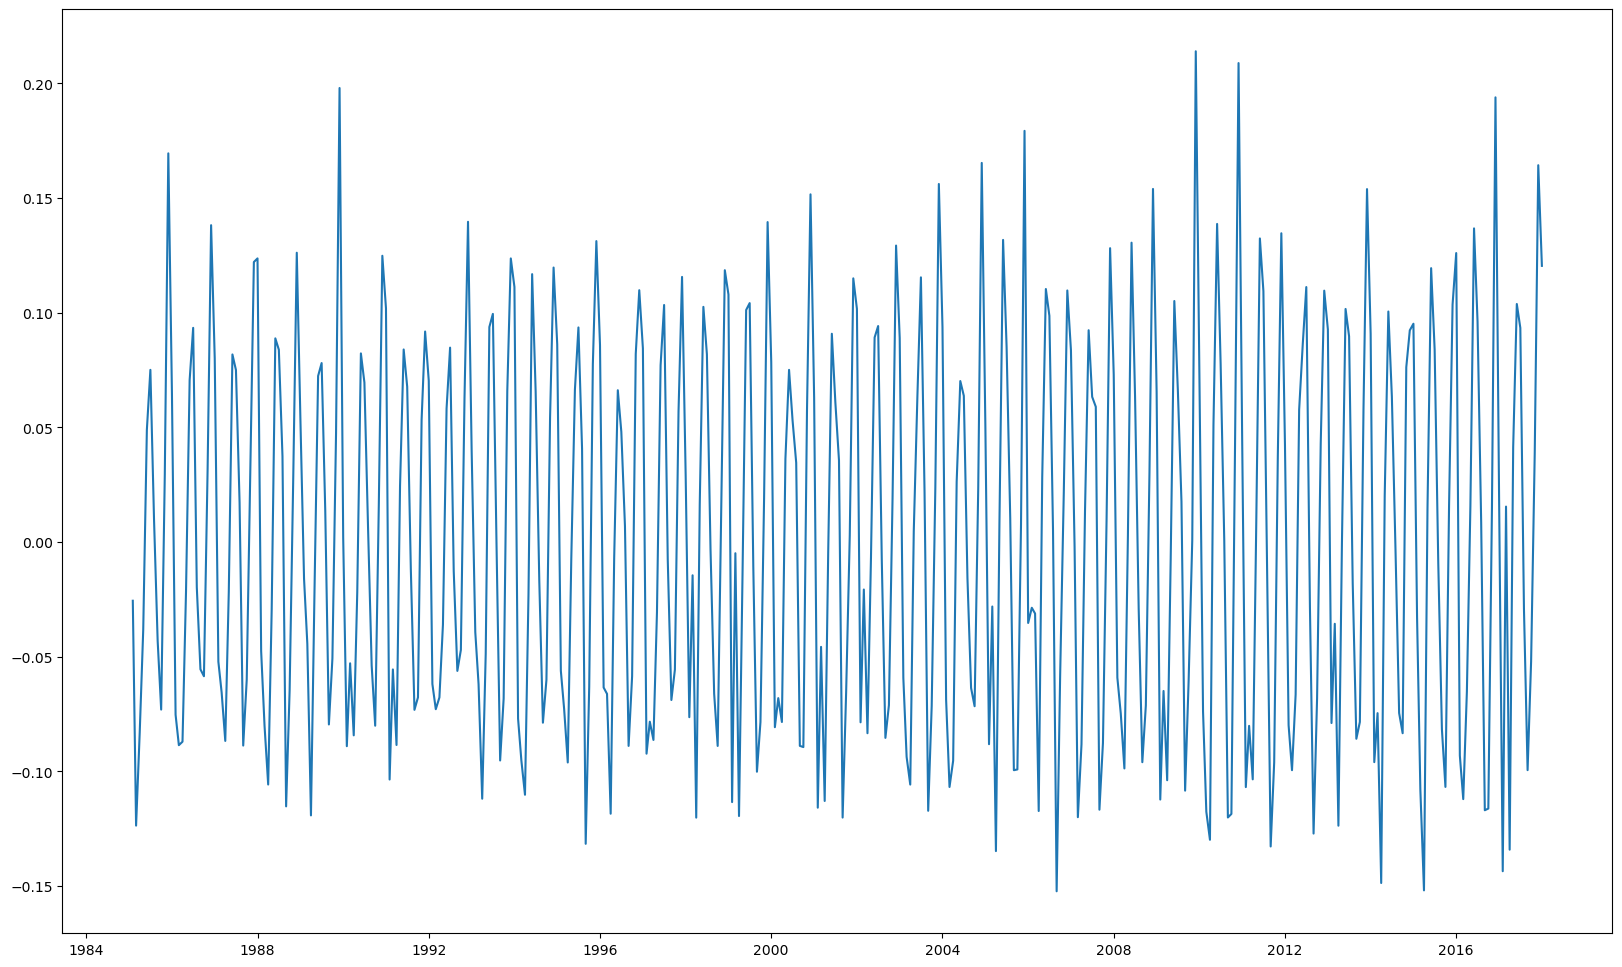

In [25]:
#Shift the values into timeseries to use in forecasting 
datasetLogDiffShifting=indexedDataset_logscale - indexedDataset_logscale.shift()
plt.plot(datasetLogDiffShifting) 
datasetLogDiffShifting


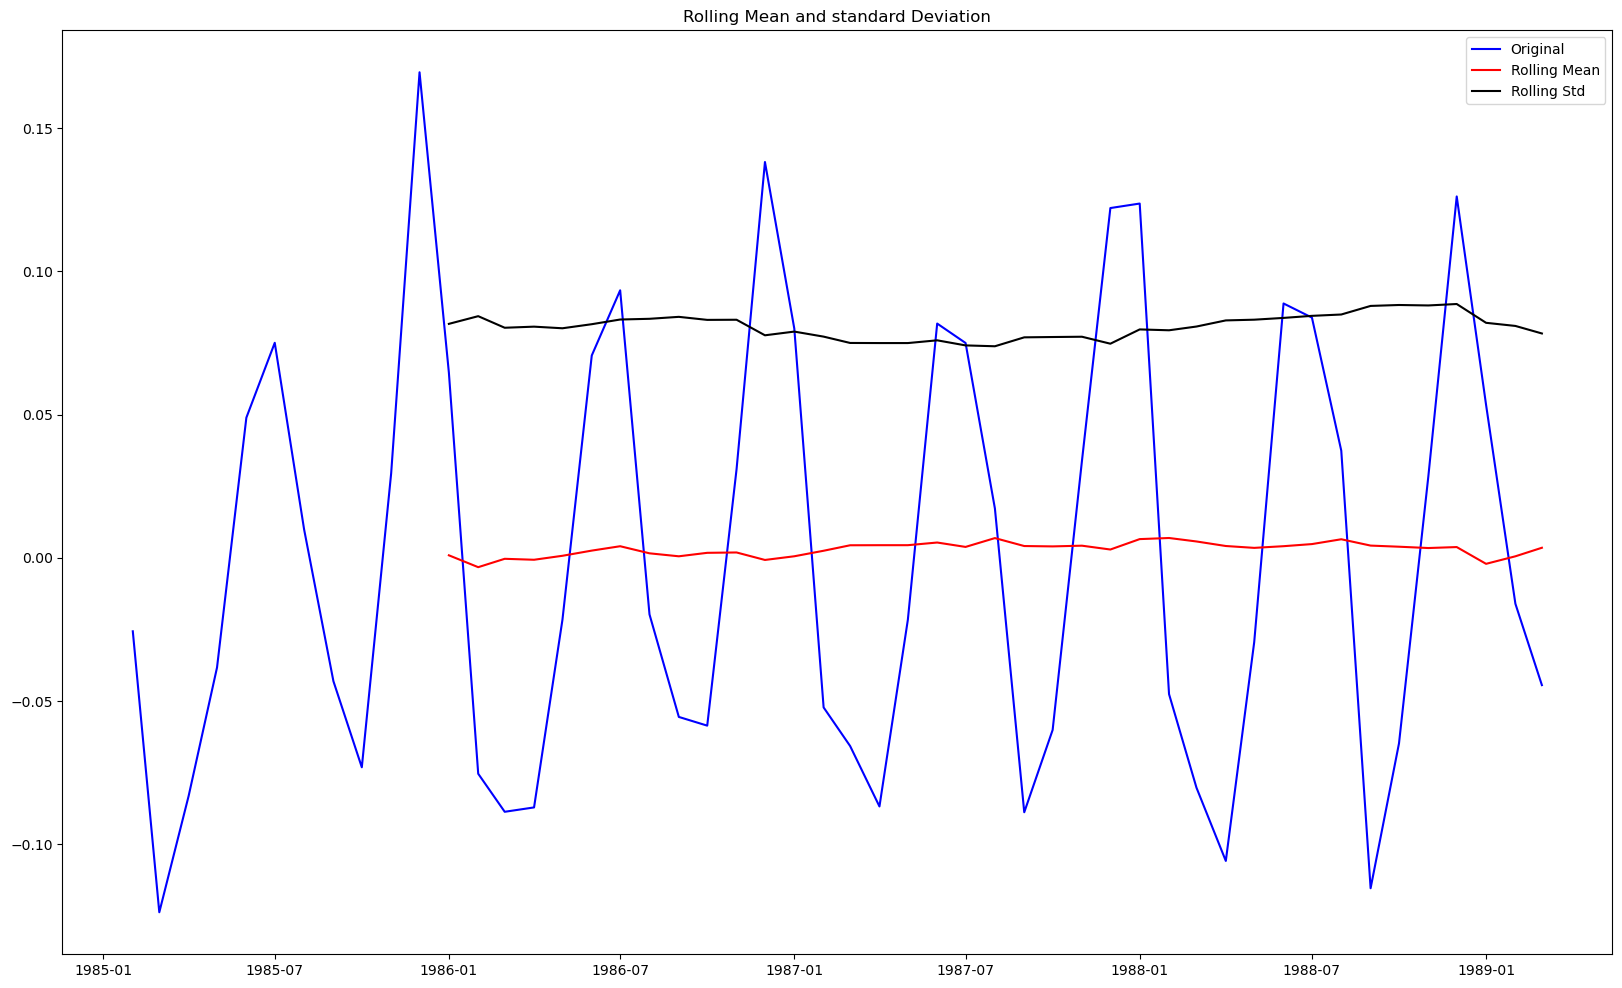

Results of Dickey-fuller Test
Test Statistic                 -2.383820
p-value                         0.146355
Lags Use                       11.000000
Number of Observations Used    38.000000
Critical value (1%)            -3.615509
Critical value (5%)            -2.941262
Critical value (10%)           -2.609200
dtype: float64


,IPG2211A2N
DATE,
1985-02-01,-0.025609
1985-03-01,-0.123680
1985-04-01,-0.083082
1985-05-01,-0.038242
1985-06-01,0.048954
...,...
2017-09-01,-0.099489
2017-10-01,-0.052051
2017-11-01,0.038991


In [26]:
#Flat output
datasetLogDiffShifting=datasetLogDiffShifting.dropna()
test_stationarity(datasetLogDiffShifting.head(50)) 
datasetLogDiffShifting

In [27]:
indexedDataset

,IPG2211A2N
DATE,
1985-01-01,72.5052
1985-02-01,70.6720
1985-03-01,62.4502
1985-04-01,57.4714
1985-05-01,55.3151
...,...
2017-09-01,98.6154
2017-10-01,93.6137
2017-11-01,97.3359


In [28]:
datasetLogDiffShifting.rolling(window=12).mean()
indexedDataset_logscale=indexedDataset_logscale.dropna()
indexedDataset_logscale=indexedDataset_logscale.fillna(0)
indexedDataset_logscale

,IPG2211A2N
DATE,
1985-01-01,4.283658
1985-02-01,4.258049
1985-03-01,4.134369
1985-04-01,4.051287
1985-05-01,4.013046
...,...
2017-09-01,4.591227
2017-10-01,4.539177
2017-11-01,4.578168


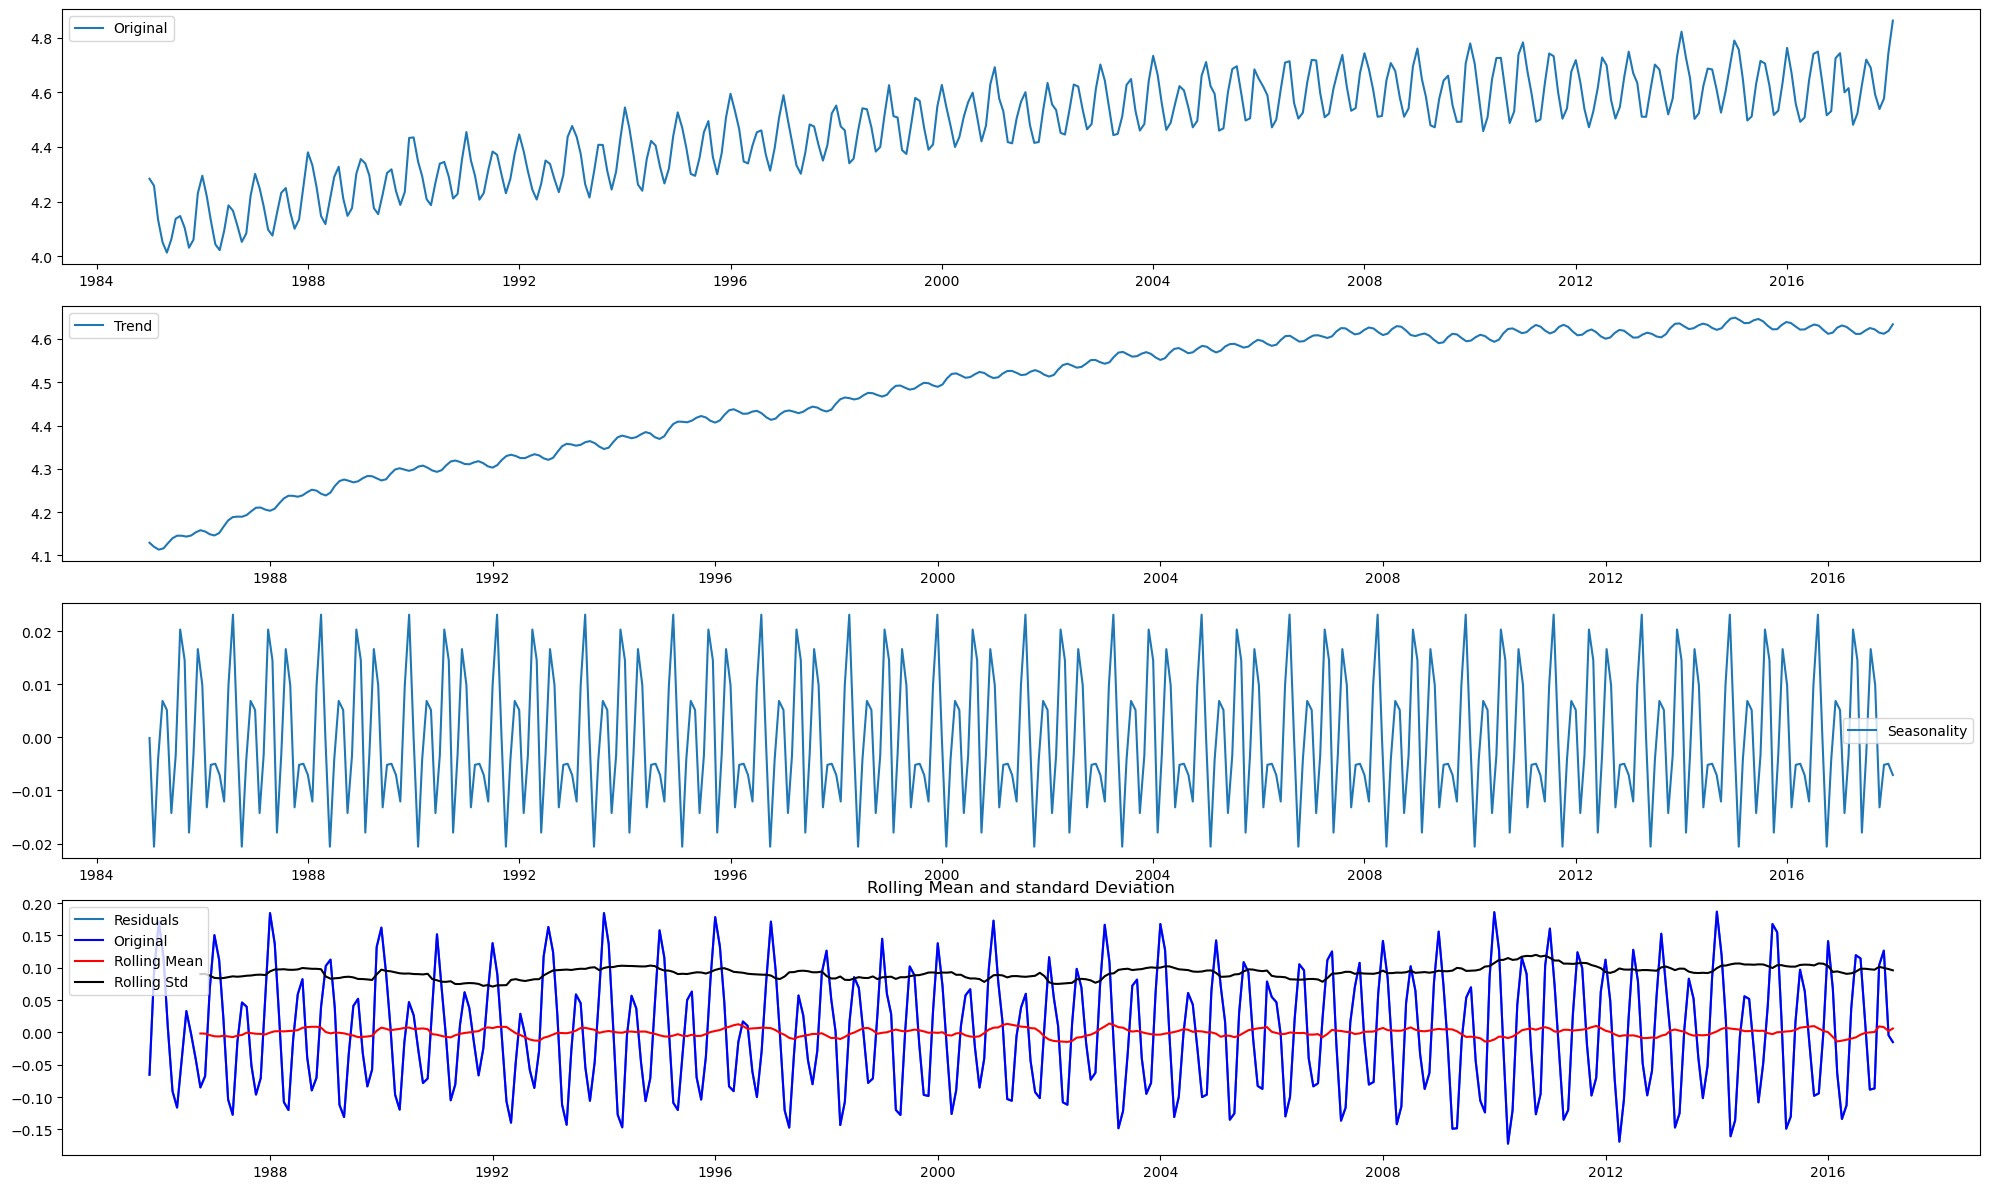

Results of Dickey-fuller Test
Test Statistic                -8.342787e+00
p-value                        3.143199e-13
Lags Used                      1.500000e+01
Number of Observations Used    3.610000e+02
Critical value (1%)           -3.448595e+00
Critical value (5%)           -2.869580e+00
Critical value (10%)          -2.571053e+00
dtype: float64


In [29]:
from random import randrange
from pandas import Series
from matplotlib import pyplot
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
decomposition=seasonal_decompose(indexedDataset_logscale, period=20)
trend=decomposition.trend
seasonal=decomposition.seasonal
residual=decomposition.resid
plt.subplot(411)
plt.plot(indexedDataset_logscale, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal, label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()
decomposedLogdata=residual
decomposedLogdata.dropna(inplace=True)
decomposedLogdata
#Testing Stationarity 
#Determing rolling statistics 
movingAverage=decomposedLogdata.rolling(window=12).mean()
movingSTD=decomposedLogdata.rolling(window=12).std() 
#plot rolling statistics
orig = plt.plot(decomposedLogdata, color='blue', label='Original')
mean =plt.plot(movingAverage, color='red', label='Rolling Mean')
std = plt.plot(movingSTD, color='black', label='Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean and standard Deviation')
plt.show(block=False)
#Perform Dickey-fuller test
print('Results of Dickey-fuller Test')
dftest=adfuller(decomposedLogdata, autolag='AIC') 
dfoutput=pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', 'Lags Used', 'Number of Observations Used'])
for key,value in dftest[4].items(): 
     dfoutput['Critical value (%s)' %key]=value
print(dfoutput)

In [30]:
indexedDataset_logscale

,IPG2211A2N
DATE,
1985-01-01,4.283658
1985-02-01,4.258049
1985-03-01,4.134369
1985-04-01,4.051287
1985-05-01,4.013046
...,...
2017-09-01,4.591227
2017-10-01,4.539177
2017-11-01,4.578168


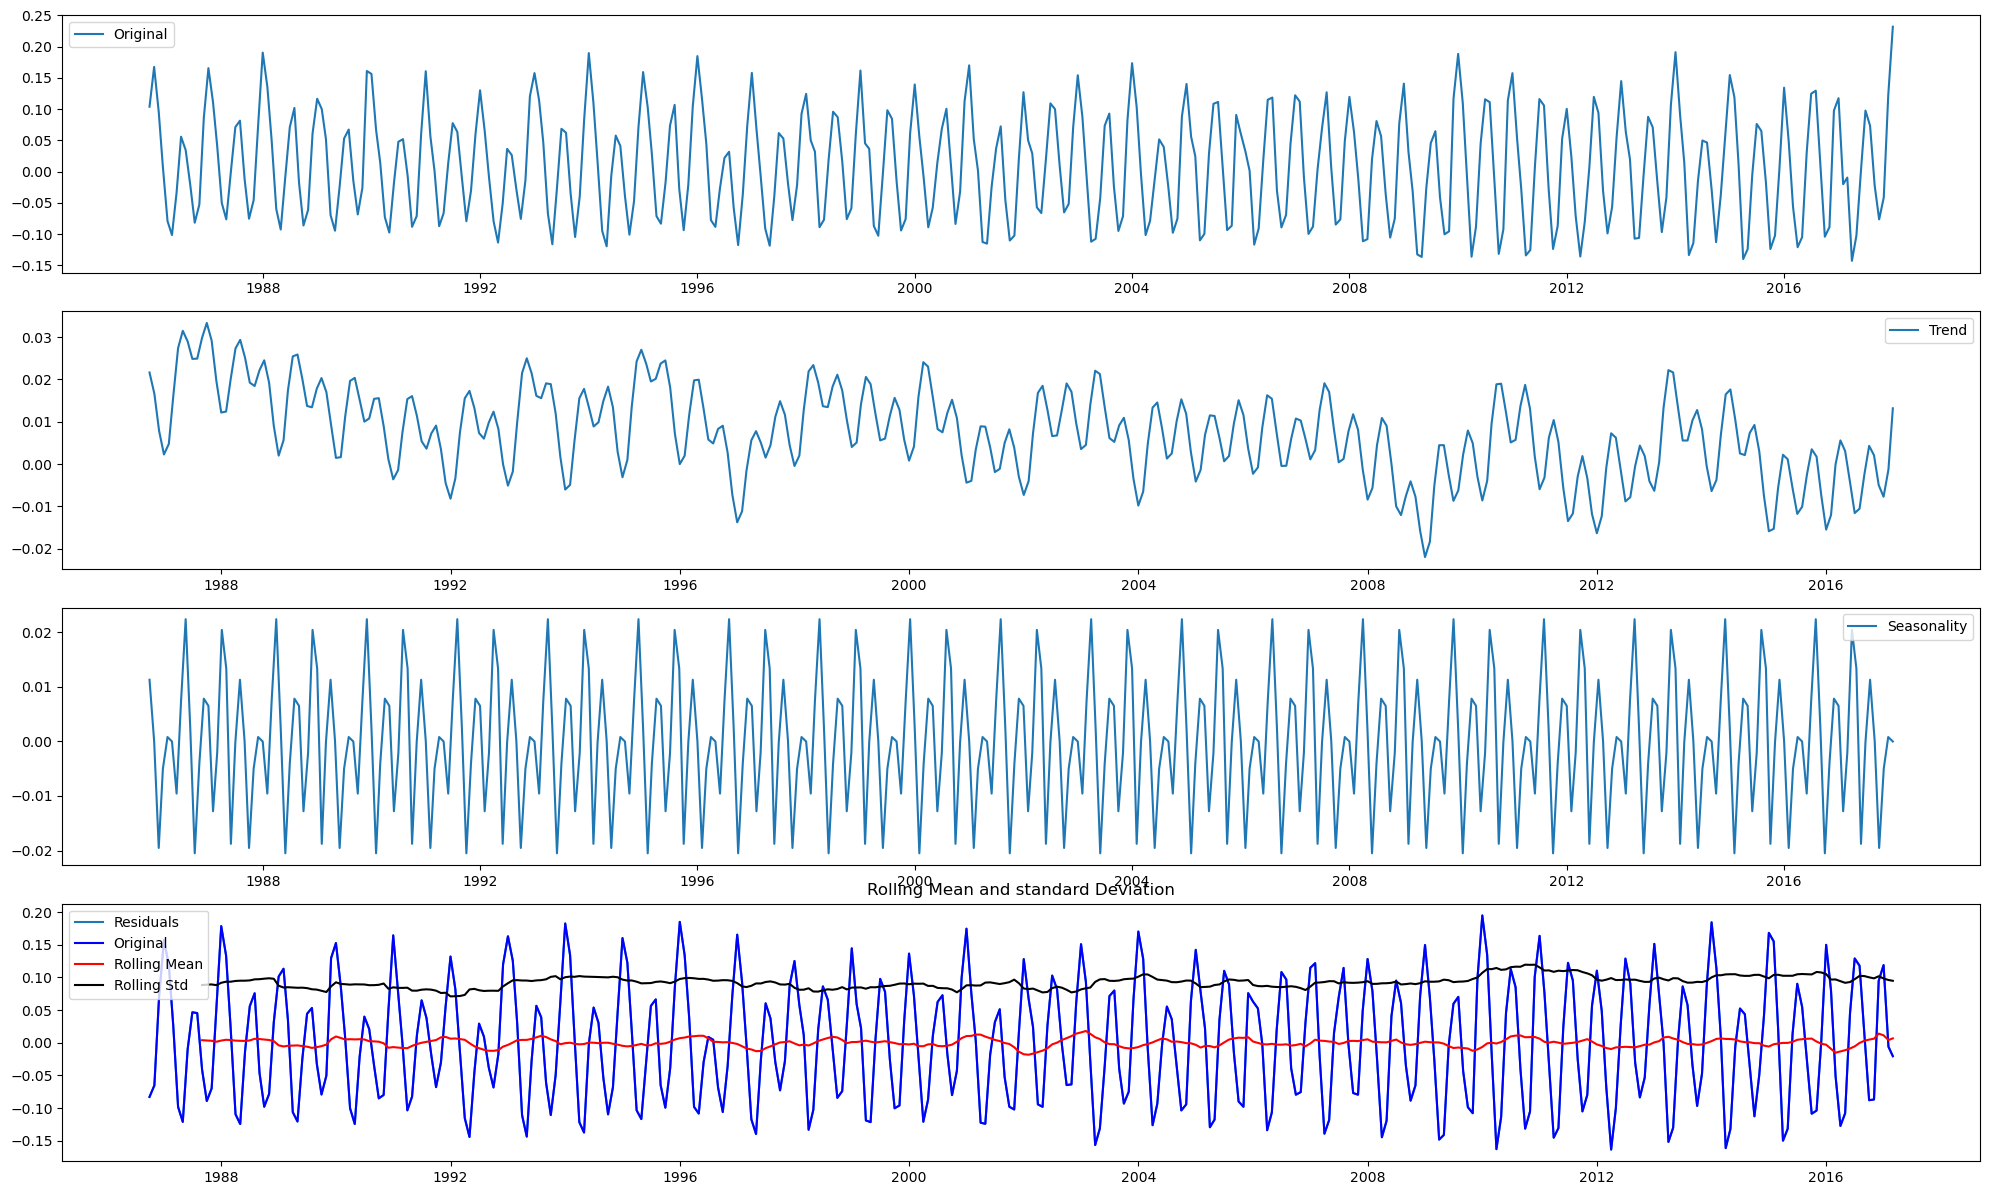

Results of Dickey-fuller Test
Test Statistic                -9.307173e+00
p-value                        1.072987e-15
Lags Used                      1.500000e+01
Number of Observations Used    3.500000e+02
Critical value (1%)           -3.449173e+00
Critical value (5%)           -2.869833e+00
Critical value (10%)          -2.571188e+00
dtype: float64


,IPG2211A2N
DATE,
1985-02-01,-0.025609
1985-03-01,-0.123680
1985-04-01,-0.083082
1985-05-01,-0.038242
1985-06-01,0.048954
...,...
2017-09-01,-0.099489
2017-10-01,-0.052051
2017-11-01,0.038991


In [31]:
decomposition=seasonal_decompose(datasetLogScaleMinusMovingAverage, period=20)
 
trend=decomposition.trend
seasonal=decomposition.seasonal
residual=decomposition.resid
plt.subplot(411)
plt.plot(datasetLogScaleMinusMovingAverage, label='Original')
plt.legend(loc='best')
plt.subplot(412) 
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal, label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()
decomposedLogdata=residual
decomposedLogdata.dropna(inplace=True)
decomposedLogdata
#Testing Stationarity 
#Determing rolling statistics 
movingAverage=decomposedLogdata.rolling(window=12).mean()
movingSTD=decomposedLogdata.rolling(window=12).std() 
#plot rolling statistics
orig = plt.plot(decomposedLogdata, color='blue', label='Original')
mean =plt.plot(movingAverage, color='red', label='Rolling Mean')
std = plt.plot(movingSTD, color='black', label='Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean and standard Deviation')
plt.show(block=False)
#Perform Dickey-fuller test
print('Results of Dickey-fuller Test')
dftest=adfuller(decomposedLogdata, autolag='AIC') 
dfoutput=pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', 'Lags Used', 'Number of Observations Used'])
for key,value in dftest[4].items(): 
 dfoutput['Critical value (%s)' %key]=value
print(dfoutput)
datasetLogDiffShifting


In [32]:
datasetLogDiffShifting


,IPG2211A2N
DATE,
1985-02-01,-0.025609
1985-03-01,-0.123680
1985-04-01,-0.083082
1985-05-01,-0.038242
1985-06-01,0.048954
...,...
2017-09-01,-0.099489
2017-10-01,-0.052051
2017-11-01,0.038991


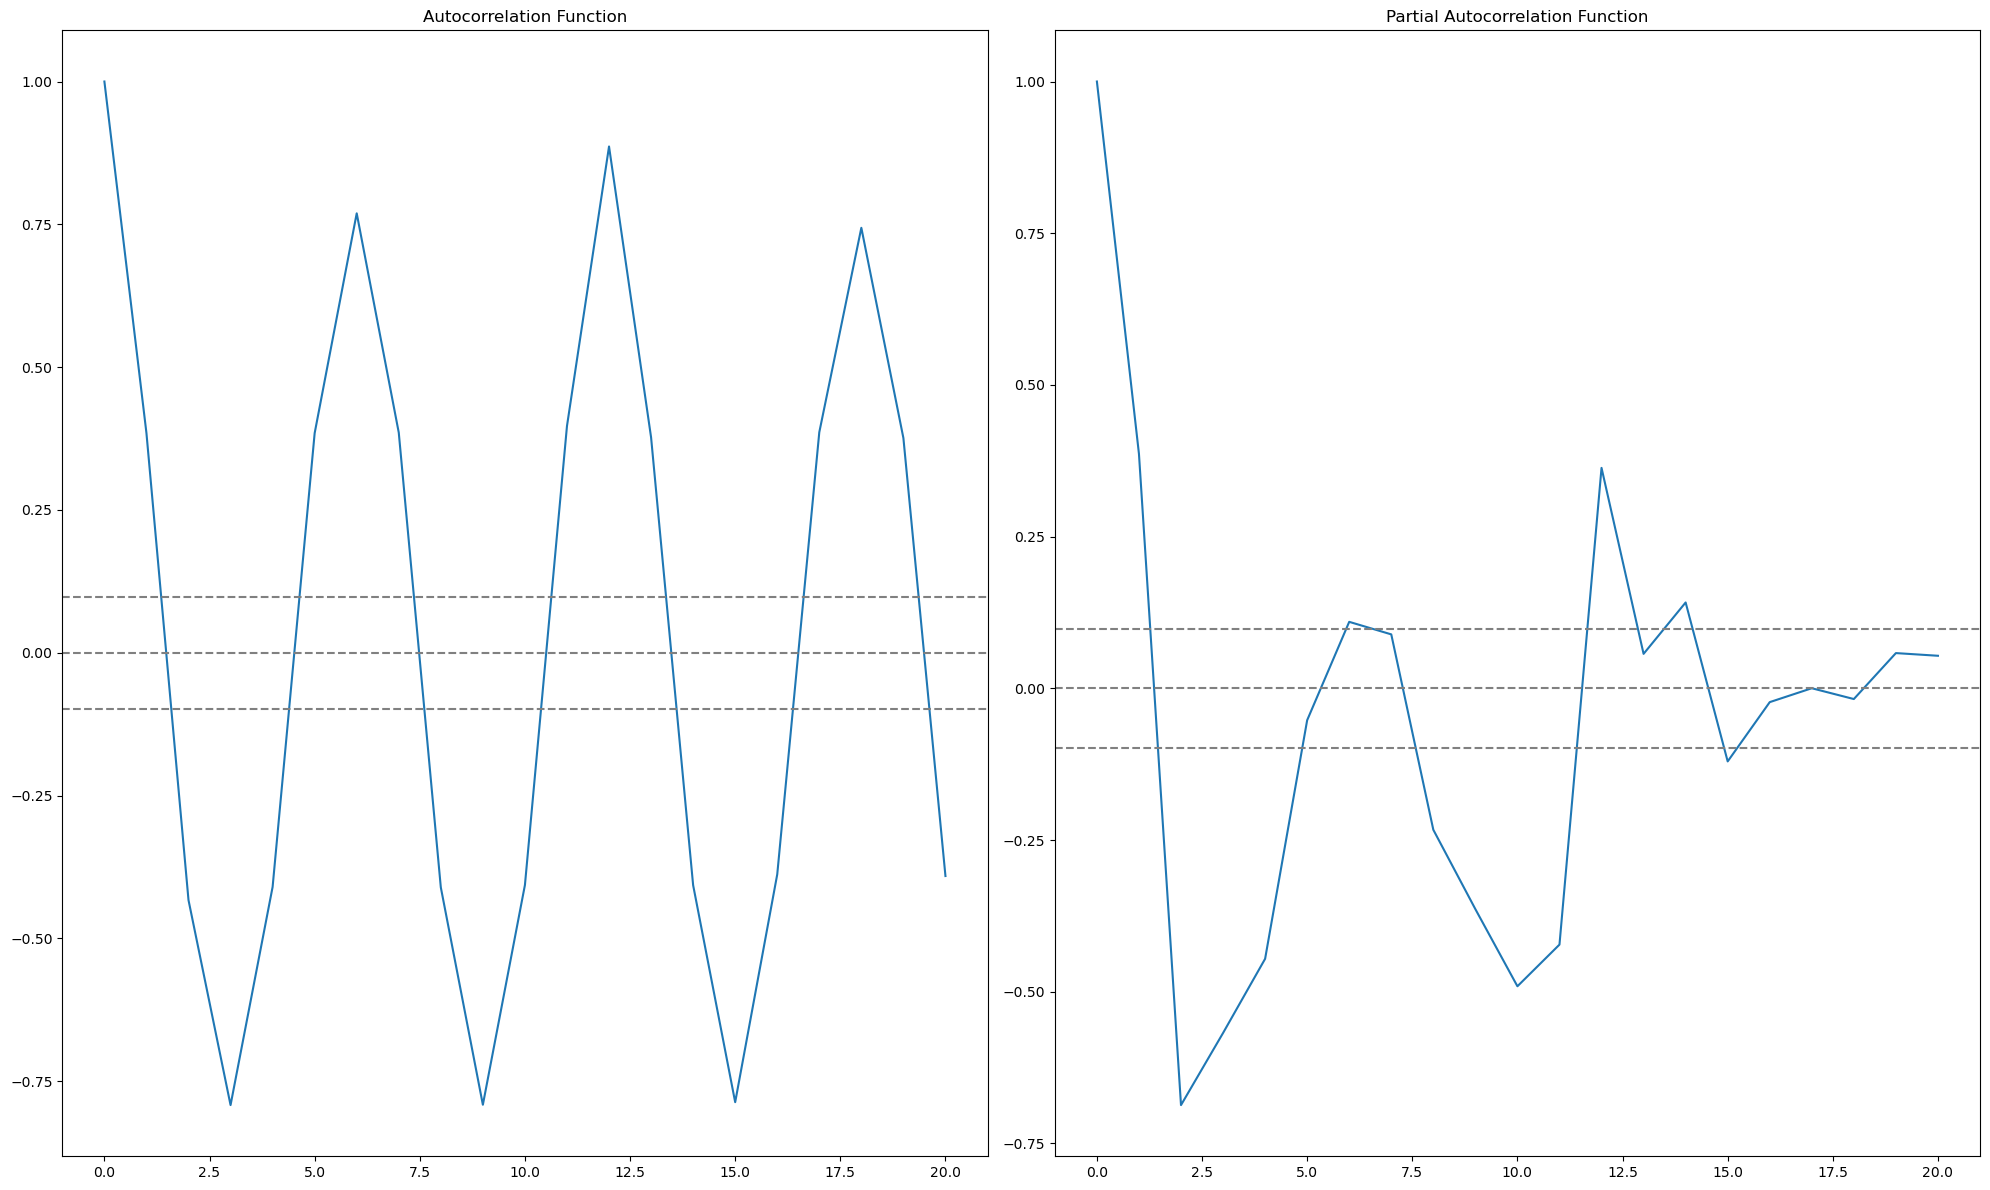

In [33]:
#ACF and PACF Plot
from statsmodels.tsa.stattools import acf, pacf
lag_acf=acf(datasetLogDiffShifting, nlags=20)
lag_pacf=pacf(datasetLogDiffShifting, nlags=20, method='ols')
#Plot ACF
plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(datasetLogDiffShifting)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(datasetLogDiffShifting)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')
#Plot PACF
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(datasetLogDiffShifting)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(datasetLogDiffShifting)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout() 

In [34]:
lag_acf

array([ 1.        ,  0.38445032, -0.43294285, -0.79175348, -0.40991521,
        0.38449087,  0.76926709,  0.38539589, -0.41066568, -0.79114935,
       -0.40659745,  0.39691407,  0.88626219,  0.37705106, -0.40680457,
       -0.78666236, -0.38789489,  0.3860148 ,  0.74393216,  0.37591781,
       -0.39077284])

In [35]:
pip install statsmodels

C:\Users\merve\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\merve\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\merve\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


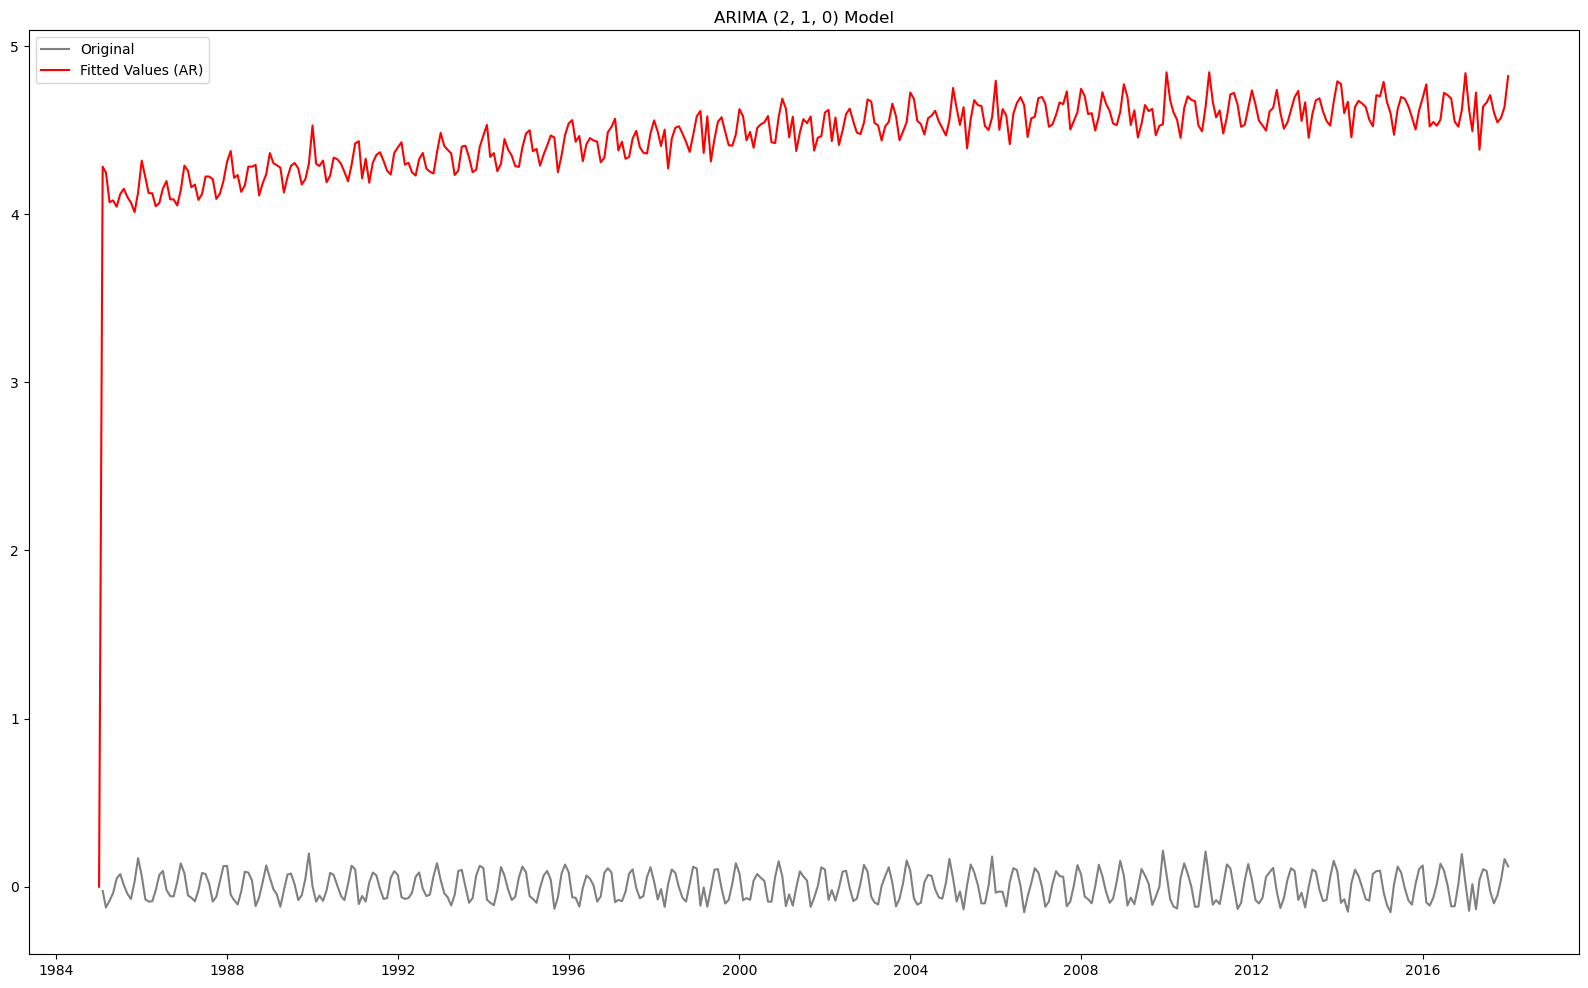

DATE
1985-01-01    0.000000
1985-02-01    4.283658
1985-03-01    4.248238
1985-04-01    4.072033
1985-05-01    4.082531
                ...   
2017-09-01    4.607740
2017-10-01    4.546958
2017-11-01    4.573861
2017-12-01    4.639108
2018-01-01    4.821925
Length: 397, dtype: float64
Plotting AR model


In [36]:
from statsmodels.tsa.arima.model import ARIMA

# Assuming you have 'indexedDataset_logscale' as the log-scaled time series data

# Set the index of the time series to a datetime index
indexedDataset_logscale.index = pd.DatetimeIndex(indexedDataset_logscale.index)

# Create a copy of the log-scaled time series
clone_indexedDataset_logscale = indexedDataset_logscale.copy()

# Create the ARIMA model with order (p, d, q) = (2, 1, 0)
model = ARIMA(clone_indexedDataset_logscale, order=(2, 1, 0))

# Fit the ARIMA model
results_AR = model.fit()

# Plot the original time series and the fitted values for AR model
plt.plot(datasetLogDiffShifting, color='gray', label='Original')
plt.plot(results_AR.fittedvalues, color='red', label='Fitted Values (AR)')
plt.legend(loc='best')
plt.title('ARIMA (2, 1, 0) Model')
plt.show()

print(results_AR.fittedvalues)
print('Plotting AR model')

C:\Users\merve\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


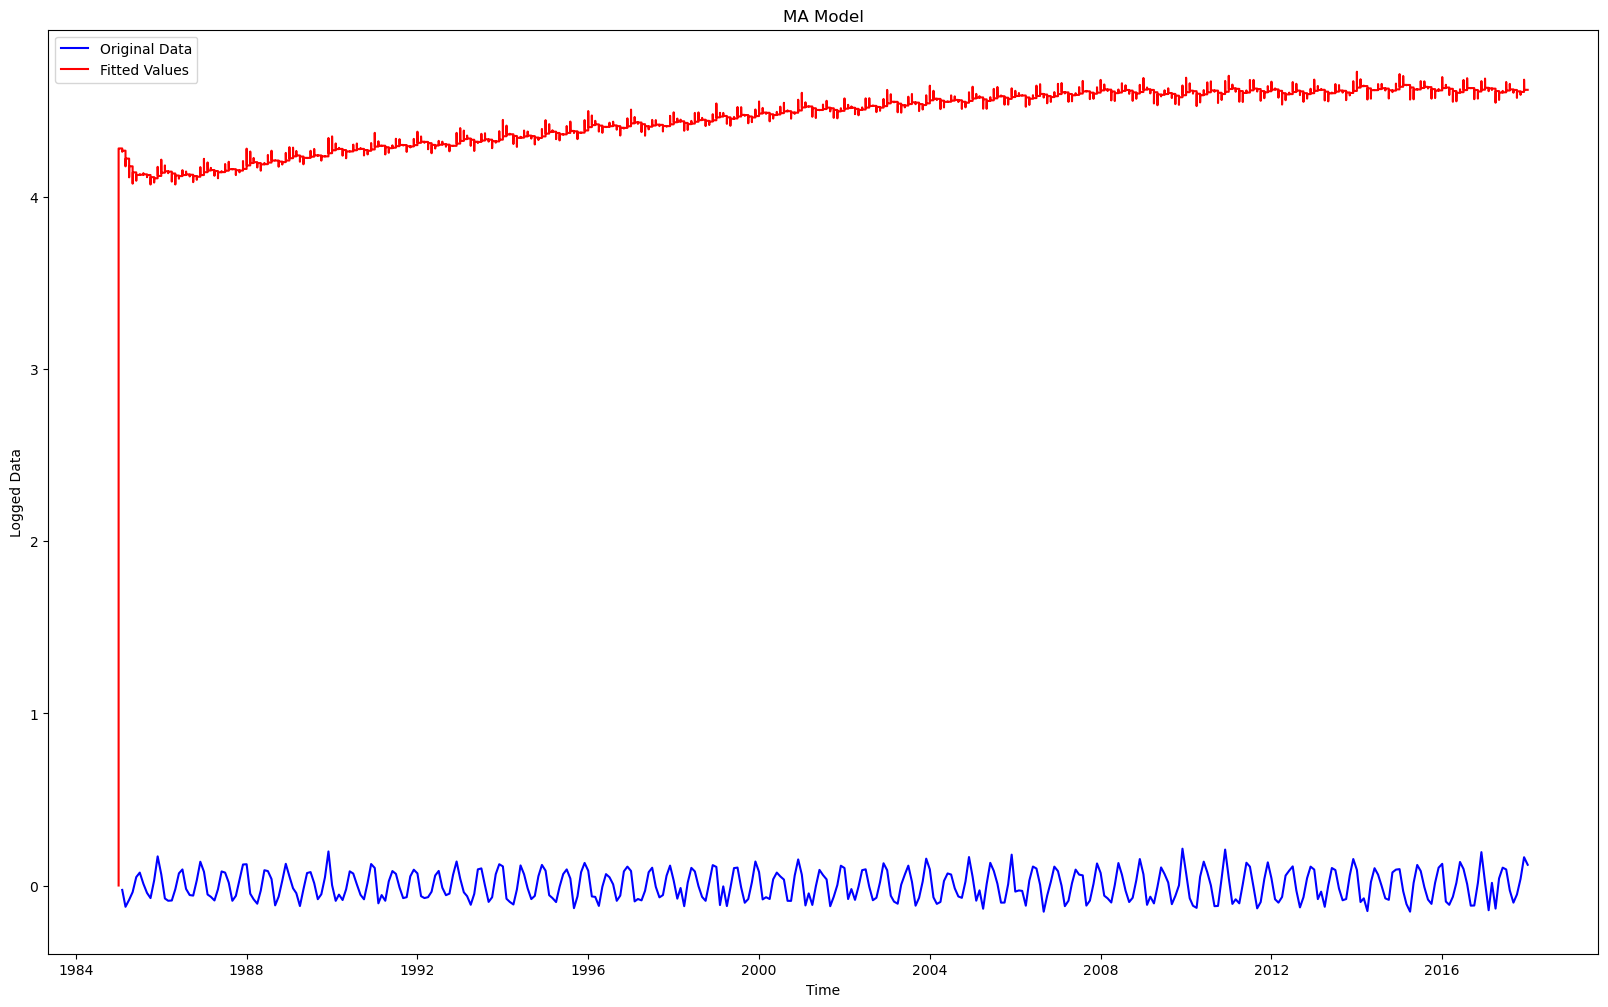

DATE
1985-01-01 00:00:00    0.000000
1985-01-01 00:30:00    4.283658
1985-01-01 01:00:00    4.283658
1985-01-01 01:30:00    4.283658
1985-01-01 02:00:00    4.283658
                         ...   
2017-12-31 22:00:00    4.624383
2017-12-31 22:30:00    4.624383
2017-12-31 23:00:00    4.624383
2017-12-31 23:30:00    4.624383
2018-01-01 00:00:00    4.624383
Freq: 30T, Length: 578545, dtype: float64
Plotting MA model


In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Assuming you have already defined 'indexedDataset_logscale' and 'datasetLogDiffShifting'

# Clone the indexedDataset_logscale and resample it to 30 minutes
clone_indexedDataset_logscale = indexedDataset_logscale.copy().resample('30min').mean()
clone_indexedDataset_logscale.index = pd.DatetimeIndex(clone_indexedDataset_logscale.index)

# Create the MA model (ARIMA with order=(0, 1, 2) for MA)
model = sm.tsa.ARIMA(clone_indexedDataset_logscale, order=(0, 1, 2))
results_MA = model.fit()

# Get the fitted values from the model
fitted_values = results_MA.fittedvalues

# Plot the original data and the fitted values
plt.plot(datasetLogDiffShifting, color='blue', label='Original Data')
plt.plot(fitted_values, color='red', label='Fitted Values')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Logged Data')
plt.title('MA Model')
plt.show()

# Print the fitted values
print(fitted_values)
print('Plotting MA model')



C:\Users\merve\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\merve\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\merve\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\merve\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


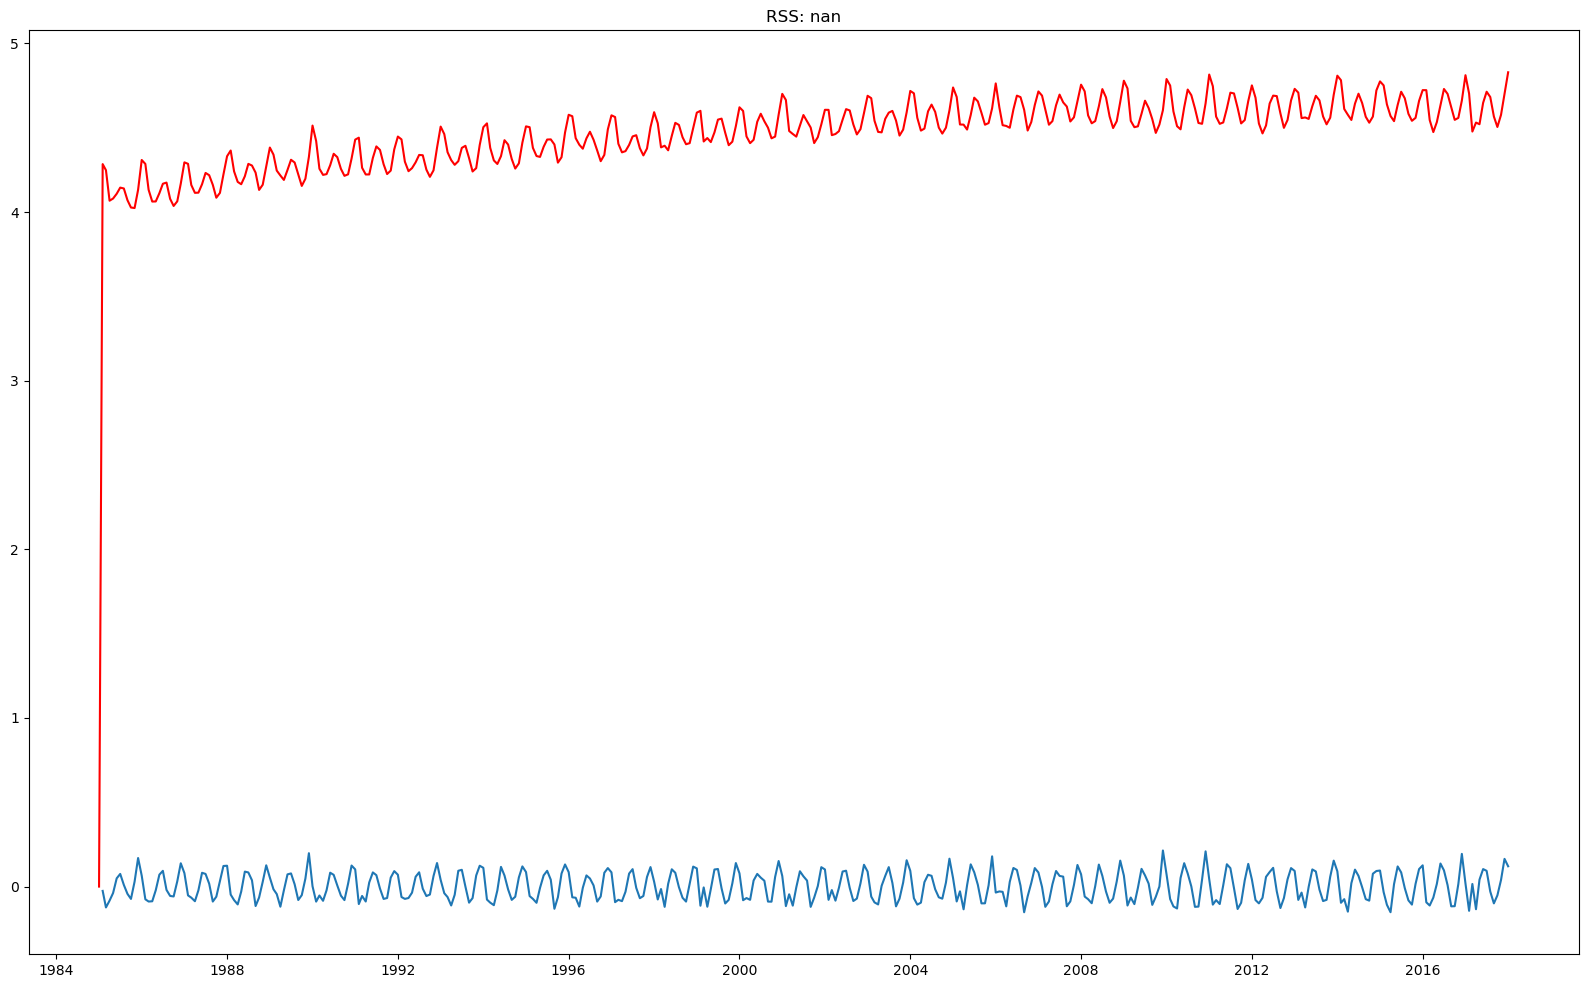

In [38]:
model = ARIMA(indexedDataset_logscale, order=(2, 1, 2))
results_ARIMA = model.fit()
plt.plot(datasetLogDiffShifting)
plt.plot(results_ARIMA.fittedvalues, color='red')
plt.title('RSS: %.4f' % sum((results_ARIMA.fittedvalues - datasetLogDiffShifting["IPG2211A2N"])**2))
plt.show()


In [39]:
predictions_ARIMA_diff=pd.Series(results_ARIMA.fittedvalues, copy=True)
print(predictions_ARIMA_diff.head()) 


DATE
1985-01-01    0.000000
1985-02-01    4.283658
1985-03-01    4.247625
1985-04-01    4.066661
1985-05-01    4.079504
dtype: float64


In [40]:
#Convert to cumulative sum
predictions_ARIMA_diff_cumsum=predictions_ARIMA_diff.cumsum()
print(predictions_ARIMA_diff_cumsum.head())


DATE
1985-01-01     0.000000
1985-02-01     4.283658
1985-03-01     8.531283
1985-04-01    12.597945
1985-05-01    16.677449
dtype: float64


In [41]:
predictions_ARIMA_log = pd.Series(indexedDataset_logscale['IPG2211A2N'], index=indexedDataset_logscale.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum, fill_value=0)

# İlk birkaç tahminin başlangıcını gösterin
predictions_ARIMA_log.head()

DATE
1985-01-01     4.283658
1985-02-01     8.541708
1985-03-01    12.665653
1985-04-01    16.649232
1985-05-01    20.690495
dtype: float64

In [42]:
predictions_ARIMA_log

DATE
1985-01-01       4.283658
1985-02-01       8.541708
1985-03-01      12.665653
1985-04-01      16.649232
1985-05-01      20.690495
                 ...     
2017-09-01    1756.350576
2017-10-01    1760.802399
2017-11-01    1765.416835
2017-12-01    1770.282656
2018-01-01    1775.231217
Length: 397, dtype: float64

C:\Users\merve\anaconda3\Lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)


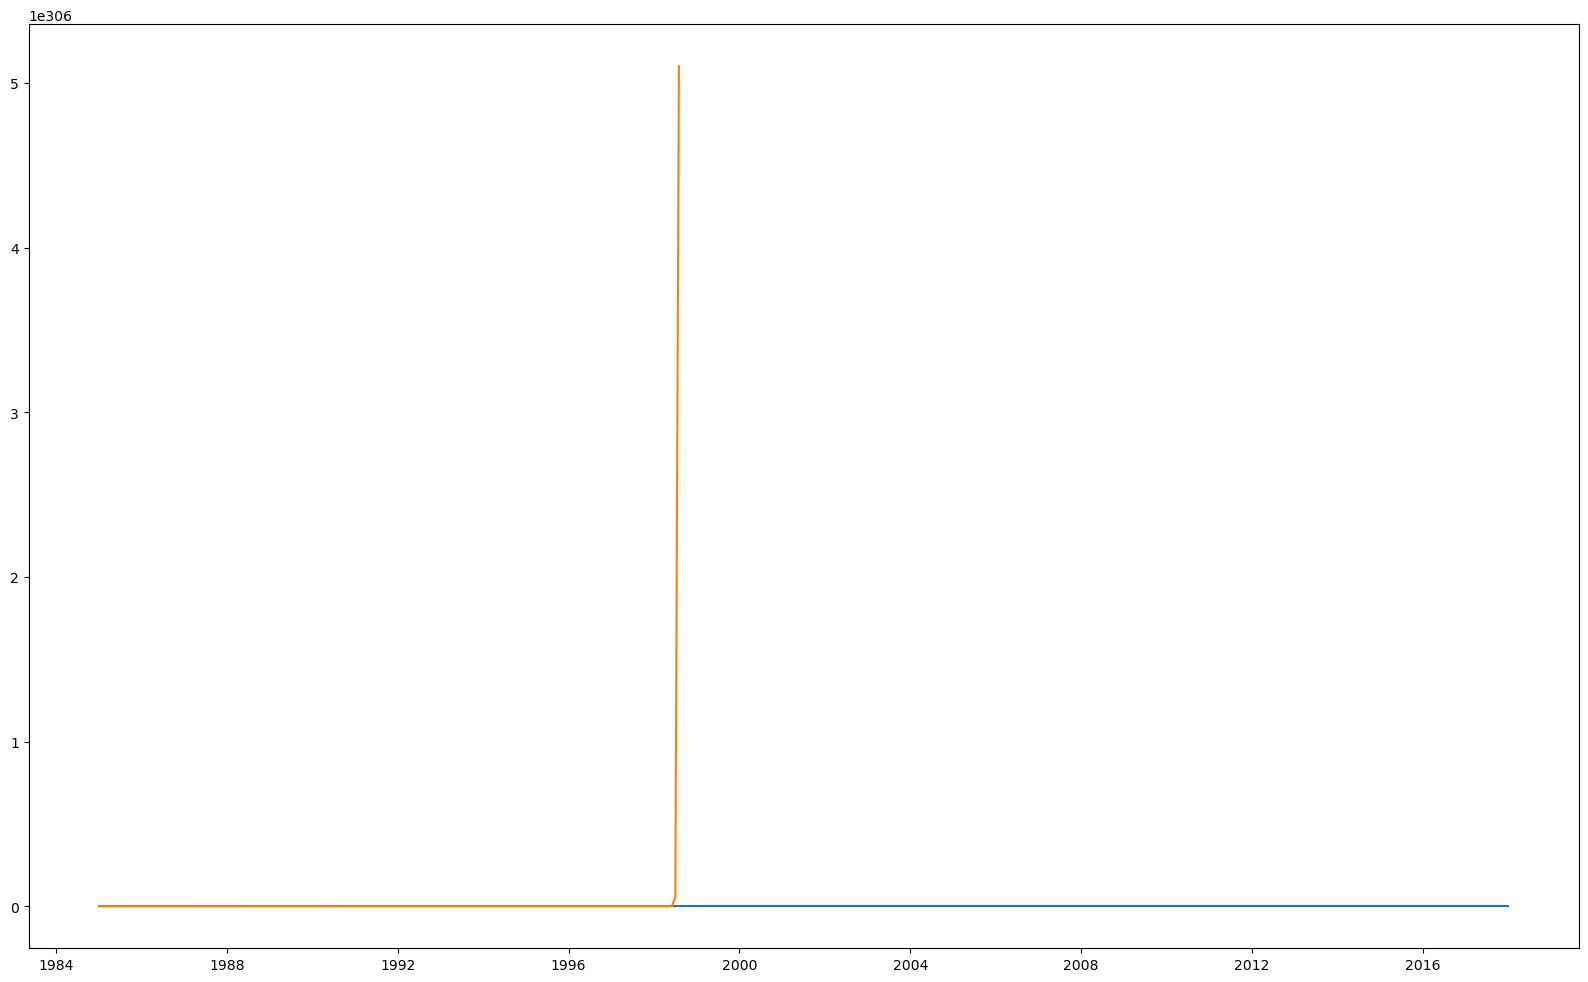

In [43]:
predictions_ARIMA=np.exp(predictions_ARIMA_log)
plt.plot(indexedDataset)
plt.plot(predictions_ARIMA)

In [44]:
predictions_ARIMA


DATE
1985-01-01    7.250520e+01
1985-02-01    5.124088e+03
1985-03-01    3.166818e+05
1985-04-01    1.700864e+07
1985-05-01    9.677599e+08
                  ...     
2017-09-01             inf
2017-10-01             inf
2017-11-01             inf
2017-12-01             inf
2018-01-01             inf
Length: 397, dtype: float64

In [45]:
indexedDataset_logscale


,IPG2211A2N
DATE,
1985-01-01,4.283658
1985-02-01,4.258049
1985-03-01,4.134369
1985-04-01,4.051287
1985-05-01,4.013046
...,...
2017-09-01,4.591227
2017-10-01,4.539177
2017-11-01,4.578168


In [46]:
x=results_ARIMA.forecast(steps=397)

In [47]:
x

2018-02-01    4.823865
2018-03-01    4.699039
2018-04-01    4.613373
2018-05-01    4.652572
2018-06-01    4.777394
                ...   
2050-10-01    4.615107
2050-11-01    4.668731
2050-12-01    4.791808
2051-01-01    4.861185
2051-02-01    4.807458
Freq: MS, Name: predicted_mean, Length: 397, dtype: float64

In [48]:
results_ARIMA

In [49]:
td = pd.read_csv('Electric_Production.csv',
 header=0,
 usecols=["IPG2211A2N"])
td

,IPG2211A2N
0,72.5052
1,70.6720
2,62.4502
3,57.4714
4,55.3151
...,...
392,98.6154
393,93.6137
394,97.3359
395,114.7212


In [50]:
td['IPG2211A2N']

0       72.5052
1       70.6720
2       62.4502
3       57.4714
4       55.3151
         ...   
392     98.6154
393     93.6137
394     97.3359
395    114.7212
396    129.4048
Name: IPG2211A2N, Length: 397, dtype: float64

In [51]:
x

2018-02-01    4.823865
2018-03-01    4.699039
2018-04-01    4.613373
2018-05-01    4.652572
2018-06-01    4.777394
                ...   
2050-10-01    4.615107
2050-11-01    4.668731
2050-12-01    4.791808
2051-01-01    4.861185
2051-02-01    4.807458
Freq: MS, Name: predicted_mean, Length: 397, dtype: float64

In [52]:
# RMSE (Root Mean Square Error)
from sklearn.metrics import mean_squared_error
y_actual = td['IPG2211A2N']
y_predicted = x
RMSE = mean_squared_error(y_actual, y_predicted, squared=False)
print("Root Mean Square Error (RMSE):\n")
print(RMSE)

Root Mean Square Error (RMSE):

85.4987812656035


In [53]:
# Mean Absolute Percentage Error (MAPE)
import numpy as np
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true))*100
MAPE=mean_absolute_percentage_error(y_actual, y_predicted)
print("Mean Absolute Percentage Error (MAPE):\n")
print(MAPE)

Mean Absolute Percentage Error (MAPE):

94.495721329716


In [54]:
df = pd.DataFrame(x)

# show the dataframe
print(df)

# iterating over and calling
# tolist() method for
# each column
for i in list(df):

 # show the list of values
 print(df[i].tolist())


            predicted_mean
2018-02-01        4.823865
2018-03-01        4.699039
2018-04-01        4.613373
2018-05-01        4.652572
2018-06-01        4.777394
...                    ...
2050-10-01        4.615107
2050-11-01        4.668731
2050-12-01        4.791808
2051-01-01        4.861185
2051-02-01        4.807458

[397 rows x 1 columns]
[4.82386490961395, 4.699038747694172, 4.6133733539933335, 4.652572169892851, 4.777394212395812, 4.862937260200228, 4.823620302356952, 4.698802524913915, 4.613381860656671, 4.652816852450365, 4.777630219271166, 4.862928462494968, 4.823375544827781, 4.698566734110603, 4.613390949242072, 4.653061684622417, 4.777865793835641, 4.862919083191467, 4.823130638341543, 4.698331375951415, 4.613400619101372, 4.653306665094229, 4.778100935423433, 4.862909122938931, 4.822885584212685, 4.698096451100787, 4.6134108695843254, 4.653551792551691, 4.7783356433714745, 4.862898582388639, 4.82264038375498, 4.697861960220411, 4.613421700038616, 4.6537970656813625, 4.7